In [1]:
from astropy.io import fits
from astropy.table import Table, join, vstack, Column
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os
from astropy import units as u 
import math as m
import csv
import pandas as pd
from collections import Counter
from scipy.stats import ks_2samp, norm
from scipy import stats
import seaborn as sns
from astropy.utils.data import get_pkg_data_filename
from matplotlib.colors import LogNorm
import pyregion
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from matplotlib.patches import Rectangle
np.set_printoptions(threshold=100000)
import matplotlib.mlab as mlab
import statmorph
from statmorph.utils.image_diagnostics import make_figure
import random
from astropy.visualization import simple_norm
from cosmocalc import cosmocalc
import scipy.constants as constants

In [67]:
pip install loess

  Created wheel for loess: filename=loess-2.1.2-cp37-none-any.whl size=18771 sha256=5ec76aec5b5b8fb4d5f6a799f054f06731f01807ccdfe1462feddd87e2e2515d
  Stored in directory: /home/ophelie/.cache/pip/wheels/9c/27/e6/2ab2901b7a9d45d71ef1f2ac4a066052f31b0563b0e83f23be
Successfully built loess
Note: you may need to restart the kernel to use updated packages.


In [69]:
from loess.loess_2d import loess_2d
from plotbin.plot_velfield import plot_velfield

NameError: name 'plotbin' is not defined

In [68]:
from distutils.sysconfig import get_python_lib
print(get_python_lib())


/home/ophelie/anaconda3/lib/python3.7/site-packages


In [2]:
n = 200
x = np.random.uniform(-1,1,n)
    
y = np.random.uniform(-1,1,n)
z = x**2 - y**2
sigz = 0.2
zran = np.random.normal(z, sigz)

zout, wout = loess_2d(x, y, zran)

plt.clf()
plt.subplot(131)
plot_velfield(x, y, z)
plt.title("True Function")

plt.subplot(132)
plot_velfield(x, y, zran)
plt.title("With Noise Added")
plt.tick_params(labelleft=False)

plt.subplot(133)
plot_velfield(x, y, zout)
plt.title("LOESS Recovery")
plt.tick_params(labelleft=False)

NameError: name 'loess_2d' is not defined

In [3]:
OGMembers_tab = fits.open('OGMembers_MorphData.fits')
OGMembers_data = Table(OGMembers_tab[1].data)

weird_members_fits = fits.open('Weird_members_morph.fits')
weird_members = Table(weird_members_fits[1].data)

OGMembers_age_fits = fits.open('OGMembers_age.fits')
OGMembers_age_data = Table(OGMembers_age_fits[1].data)

                          
                


In [4]:
colour = ['#778B94', '#8439DA', '#322D14', '#FB7DE6', '#5BD792', '#EA5E66', '#304588', '#50E8BD', '#AB5DEA', '#58AE3F', '#2D8E15', '#5F7E8C', '#4AB612', '#AE798C', '#86142C', '#54279D', '#9DB7F1', '#5A0A36', '#9DACE1', '#DF66DC', '#C5E31A', '#538DCA', '#27BC8C', '#6468DB', '#C58EA2', '#25F829', '#AA4154', '#8E1F81', '#239DCF']
OGMembers_data['colour'] = colour

In [5]:
weird_members_fits = fits.open('Weird_members_morph.fits')
weird_members = Table(weird_members_fits[1].data)

In [6]:
OGMembers_age_fits = fits.open('OGMembers_age.fits')
OGMembers_age_data = Table(OGMembers_age_fits[1].data)

In [7]:
BCG = OGMembers_data[OGMembers_data['phot_id'] == 529]


In [8]:
dimMembers_fits = fits.open('dimMembers.fits')
dimMembers = Table(dimMembers_fits[1].data)

In [9]:
dimMembers

phot-id,ra,dec,kron(f105),ekron(f105),0p8(f105),e0p8(f105),kron(f140),ekron(f140),0p8(f140),e0p8(f140),fwhm(asec),zz,zlo,zhi,chi,spec-id,mcode,snr,em-code,member1,member2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64
553,34.430246999999994,-3.7623230000000003,25.5908,0.1381,25.6302,0.1006,24.0451,0.05,24.2178,0.0515,0.314197,1.7143169999999999,1.708738,1.717543,0.699585,545,1,4.52701,0,0.0,0.0
602,34.438201,-3.761128,25.6426,0.1278,25.7083,0.1058,24.1416,0.0511,24.2195,0.051,0.27221,1.231816,1.10048,1.951164,0.732452,602,1,4.37009,0,0.0,0.0
679,34.436177,-3.759493,26.1,0.2182,25.9231,0.1308,24.1664,0.0532,24.3677,0.0557,0.277321,1.9454240000000003,1.422121,1.9803110000000002,0.704613,675,1,3.62395,0,0.344404,0.588114
650,34.431771000000005,-3.7600309999999997,26.6822,0.35700000000000004,26.5778,0.2205,24.3915,0.0613,24.6047,0.0635,0.312206,1.99085,1.489471,2.013093,0.701132,647,1,3.35376,0,0.787317,0.0434666
690,34.437579,-3.75936,25.9487,0.1732,25.9077,0.1254,24.3349,0.0579,24.4483,0.0579,0.256269,1.50735,1.504181,1.518125,0.7305520000000001,688,1,3.27398,0,0.0,0.0
435,34.428758,-3.764911,25.8424,0.153,25.9881,0.1377,24.6064,0.0669,24.7228,0.0675,0.268111,2.050636,1.485271,3.370048,0.721661,429,1,3.10026,0,0.025592300000000002,0.0
704,34.437143,-3.7590480000000004,25.7824,0.1399,25.9109,0.1318,24.5819,0.0643,24.6465,0.0637,0.253663,1.668136,1.366265,4.009456,0.722175,700,1,3.0280299999999998,0,0.0,0.0
393,34.423266999999996,-3.765819,25.3688,0.1347,25.6129,0.1028,24.0776,0.0531,24.4354,0.0579,0.409107,2.0091799999999997,2.0036,2.0131580000000002,0.693124,386,1,2.83279,1,0.00986309,5.58931e-08
367,34.431587,-3.7666510000000004,26.0197,0.1897,26.1778,0.1563,24.6243,0.0697,24.7758,0.0696,0.398019,2.311251,2.299519,2.384855,0.720102,362,1,2.79315,0,0.0,0.0


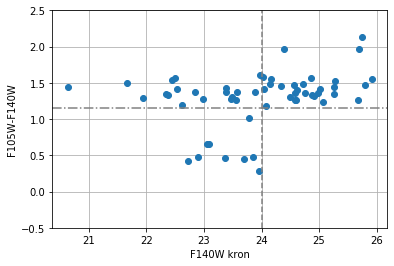

In [10]:
plt.plot(dimMembers['kron(f140)'], (dimMembers['0p8(f105)']-dimMembers['0p8(f140)']), 'o')

plt.xlabel('F140W kron')
plt.ylabel('F105W-F140W')
plt.grid(True)
#plt.xlim(1, 2.5)
plt.ylim(-0.5, 2.5)

plt.axvline(24, ls='--', color='grey')
plt.axhline(1.15, ls='-.', color='grey')

#plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), ncol = 3)

plt.show()

In [10]:
OGMembers_data['zz']

1.981413
1.9773490000000002
1.977416
1.9868970000000001
1.9928669999999997
1.9906720000000002
1.962563
1.972318
1.9773459999999998
1.970551
1.980749


In [11]:
for i in range (len(OGMembers_data)):
    
    if((OGMembers_data['0p8(f105)'][i]-OGMembers_data['0p8(f140)'][i]) > 1.15):
        OGMembers_data['colour'][i] = 'red'
        
    if((OGMembers_data['0p8(f105)'][i]-OGMembers_data['0p8(f140)'][i]) < 1.15):
        OGMembers_data['colour'][i] = 'blue'
        

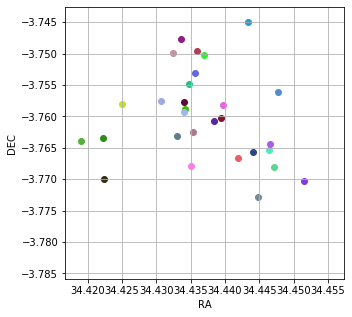

In [12]:
colour = ['#778B94', '#8439DA', '#322D14', '#FB7DE6', '#5BD792', '#EA5E66', '#304588', '#50E8BD', '#AB5DEA', '#58AE3F', '#2D8E15', '#5F7E8C', '#4AB612', '#AE798C', '#86142C', '#54279D', '#9DB7F1', '#5A0A36', '#9DACE1', '#DF66DC', '#C5E31A', '#538DCA', '#27BC8C', '#6468DB', '#C58EA2', '#25F829', '#AA4154', '#8E1F81', '#239DCF']

plt.rcParams["figure.figsize"] = (5,5)

for i in range(len(OGMembers_data)):
    
    plt.scatter(OGMembers_data['ra'][i], OGMembers_data['dec'][i], color = colour[i])


plt.xlabel('RA')
plt.ylabel('DEC')

plt.grid(True)



In [13]:
'''Calculate luminosity distance'''

def ang_dist(tab, arg):
    
    lum_ang_arr = []

    for i in range(len(tab)):
    
        DA = cosmocalc(tab[arg][i], H0 = 69.6, WM = 0.286, WV = 0.714)['DA_Mpc']
    
        lum_ang_arr.append(DA)
        
    return np.array(lum_ang_arr)


In [14]:
#function to find distance to 5 closest member

def rho_avg5(members, dim):
    
    
    d2d_col = np.empty([len(members), ], dtype = float)
    
    avg_col = np.empty([len(members), ], dtype = float)
    
    for i in range (len(members)):
        
        
        target = members[i]
        
        #in_range = members[(members['V_r']>=(target['V_r']-1000)) & (members['V_r']<=(target['V_r']+1000))]
        
        #in_range_all = all_members[(all_members['V_r']>=(target['V_r']-1000)) & (all_members['V_r']<=(target['V_r']+1000))]
        
        #plus_Z = (target['V_r']+1000)/2.998e+5
        
        #minus_Z = (target['V_r']-1000)/2.998e+5
        
        plus_Z = max(members['zz'])
        minus_Z = min(members['zz'])
        
        if (len(members) >= 5): 
            
            c = SkyCoord(ra=target['ra']*u.degree, dec=target['dec']*u.degree)
            
            catalog = SkyCoord(ra=dim['ra']*u.degree, dec=dim['dec']*u.degree)
            
            idx, d2d, d3d = c.match_to_catalog_sky(catalog, nthneighbor=5)
            
            d2d_col[i] = d2d.arcsec
            
            #area_all = ((cosmocalc(target['zz'], H0 = 69.6)['DCMR_Mpc'])**2)*(((m.pi)**2)/(180**2)) * (7966)
            r500 = 440 / 1000 #(kpc-mpc)
            area_all = (m.pi)*(r500**2)

            avg_col[i] = len(dim) / (area_all)
        
        
        else:
            
            d2d_col[i] = (-100)
            avg_col[i] = (-100)
        
        
    return d2d_col, avg_col

In [15]:
#function to find distance of each member to BCG

def d2d_BCG(members):
    
    
    sep_col = np.empty([len(members), ], dtype = float)
    
            
        
    BCG = members[members['phot_id'] == 529]

        
        #in_range = members[(members['V_r']>=(target['V_r']-1000)) & (members['V_r']<=(target['V_r']+1000))]
        
        #in_range_all = all_members[(all_members['V_r']>=(target['V_r']-1000)) & (all_members['V_r']<=(target['V_r']+1000))]
        
        #plus_Z = (target['V_r']+1000)/2.998e+5
        
        #minus_Z = (target['V_r']-1000)/2.998e+5
        
    for i in range(len(members)):
        
        
        c1 = SkyCoord(ra=BCG['ra']*u.degree, dec=BCG['dec']*u.degree)
            
        c2 = SkyCoord(ra=members[i]['ra']*u.degree, dec=members[i]['dec']*u.degree)
            
        sep = c1.separation(c2)
            
        sep_col[i] = sep.arcsecond
            
                #area_all = ((cosmocalc(target['zz'], H0 = 69.6)['DCMR_Mpc'])**2)*(((m.pi)**2)/(180**2)) * (7966)
                
        
    return sep_col

In [16]:
OGMembers_data

phot_id,Gini,M20,"F(G,M20)","S(G,M20)",C,A,S,sersic_cutout,sersic_psf,ra,dec,kron(f105),ekron(f105),0p8(f105),e0p8(f105),kron(f140),ekron(f140),0p8(f140),e0p8(f140),fwhm(asec),zz,zlo,zhi,chi,spec-id,mcode,snr,em-code,member1,member2,colour
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,str7
146.0,0.47061407385916787,-1.3433392210998112,-0.6995262541749501,-0.04781621861229757,2.516624692410333,0.16317672786309842,0.0028551052071380425,0.8359274889073318,1.0412694010117967,34.444783,-3.772856,23.445999999999998,0.0372,24.1191,0.0378,22.9016,0.0304,23.6377,0.0405,0.895759,1.981413,1.9778799999999999,1.9856939999999998,0.9316639999999999,145,1,6.714639999999999,1,1.0,0.0,blue
240.0,0.544111141234312,-1.7246870065068014,-0.07144175538094188,-0.02806146408247656,2.9942829734708134,-0.06477465010358852,0.009861761830241724,1.4690106443940047,1.4690106443940047,34.45158,-3.770285,99.0,99.0,99.0,99.0,23.0151,0.0625,23.5353,0.077,0.612092,1.9773490000000002,1.275339,1.9799189999999998,1.13542,236,1,3.6847800000000004,1,0.984137,0.000669443,red
243.0,0.5049907015133024,-1.7626512584671599,-0.23877870539141144,-0.07206773042876591,2.731013355884195,0.03269493516456315,0.0,0.9361019844554965,5.258001755989425,34.422416999999996,-3.770003,23.7783,0.0393,24.0476,0.0353,22.6169,0.0283,22.8488,0.031,0.325858,1.977416,1.974125,1.9799080000000002,0.74305,240,1,10.0848,0,1.0,7.35868e-11,red
300.0,0.5262552524058411,-1.719699681147167,-0.16328462155609946,-0.0450455557976735,2.763935862483167,0.029687281963913355,0.0,0.8830844140342652,4.353034512217102,34.435031,-3.7679480000000005,24.085,0.0539,24.3496,0.0423,22.5026,0.0233,22.7896,0.026000000000000002,0.338485,1.9868970000000001,1.9842830000000002,1.9890740000000002,0.769476,295,1,16.9164,0,1.0,1.13463e-22,red
305.0,0.600329345462422,-2.082245091909897,0.4546261087325476,-0.022106015767677956,3.524088195073759,0.02472485391861996,0.00794620468798356,1.1458361079713881,3.9063687693919165,34.447153,-3.768007,23.8277,0.0513,24.4884,0.0481,22.5249,0.0248,23.0674,0.0304,0.323371,1.9928669999999997,1.9901650000000002,1.995379,0.8747719999999999,298,1,11.8451,0,1.0,0.0,red
347.0,0.5107059092774276,-1.7696610385160123,-0.2056306493851361,-0.0673840341690724,2.7876584183345243,-0.03376216054452196,0.03419352126397179,1.065721957149683,7.267380119207635,34.441846000000005,-3.766667,24.8274,0.0937,25.2311,0.0764,23.5611,0.0411,23.9654,0.0464,0.396702,1.9906720000000002,1.97606,2.0133900000000002,0.80291,345,1,7.275989999999999,0,0.95015,2.25891e-06,red
375.0,0.530769676442604,-1.862401218359155,-0.0420460572862158,-0.06041178967374461,3.087450289641537,0.008955019407012632,-0.006453281954315859,1.2250703402546128,41.30942168207532,34.444096,-3.7656669999999997,23.5689,0.0386,24.2904,0.0405,23.0819,0.0324,23.6346,0.0394,0.369915,1.962563,1.9601810000000002,1.9645580000000002,0.819581,372,1,7.98415,1,0.9854799999999999,4.1122e-09,blue
407.0,0.4405694670719289,-1.6803623602938007,-0.6146900223103478,-0.1244065956796287,2.484243344531938,0.060670291600443675,0.05667004195150658,0.9211072818110162,0.3755598809369359,34.446407,-3.7653190000000003,23.5492,0.0322,24.363000000000003,0.0427,23.0458,0.03,23.7014,0.0404,0.47866499999999995,1.972318,1.964912,1.9796790000000002,0.8213520000000001,402,1,5.39205,0,0.9974729999999999,0.000148429,blue
434.0,0.49730776261437015,-1.822435598480205,-0.23537870531208593,-0.08798386320052204,2.9735133426183644,-0.01802349251108937,0.004381814807713906,1.1599714742048834,2.5463105906811982,34.446607,-3.764467,25.0249,0.125,25.999000000000002,0.1398,23.8874,0.0527,24.6204,0.0668,0.806517,1.9773459999999998,1.147973,2.205463,0.801847,428,1,3.05189,0,0.617113,0.00543194,red


In [17]:
OGMembers_data['d2d_5_1'], OGMembers_data['avg_rho_1'] = rho_avg5(OGMembers_data, OGMembers_data)


In [18]:
OGMembers_data['d2d_5'], OGMembers_data['avg_rho'] = rho_avg5(OGMembers_data, dimMembers)


In [19]:
OGMembers_data['sep_BCG'] = d2d_BCG(OGMembers_data)


In [20]:
OGMembers_data['d_ang'] = ang_dist(OGMembers_data, 'zz')
OGMembers_data['R_mpc'] = OGMembers_data['d2d_5'] * OGMembers_data['d_ang'] * constants.arcsec
OGMembers_data['rho'] = 5 / (np.pi * (OGMembers_data['R_mpc'])**2)
OGMembers_data['delta'] = (OGMembers_data['rho'] / OGMembers_data['avg_rho']) - 1
OGMembers_data['log_delta'] = np.log10(OGMembers_data['delta'] + 1)

OGMembers_data['BCGsep_mpc'] = OGMembers_data['sep_BCG'] * OGMembers_data['d_ang'] * constants.arcsec


In [21]:
OGMembers_data['d_ang_1'] = ang_dist(OGMembers_data, 'zz')
OGMembers_data['R_mpc_1'] = OGMembers_data['d2d_5_1'] * OGMembers_data['d_ang_1'] * constants.arcsec
OGMembers_data['rho_1'] = 5 / (np.pi * (OGMembers_data['R_mpc_1'])**2)
OGMembers_data['delta_1'] = (OGMembers_data['rho_1'] / OGMembers_data['avg_rho_1']) - 1
OGMembers_data['log_delta_1'] = np.log10(OGMembers_data['delta_1'] + 1)



In [22]:
# Gini-M20 diagram

plt.rcParams["figure.figsize"] = (6,4)


colour = ['#778B94', '#8439DA', '#322D14', '#FB7DE6', '#5BD792', '#EA5E66', '#304588', '#50E8BD', '#AB5DEA', '#58AE3F', '#2D8E15', '#5F7E8C', '#4AB612', '#AE798C', '#86142C', '#54279D', '#9DB7F1', '#5A0A36', '#9DACE1', '#DF66DC', '#C5E31A', '#538DCA', '#27BC8C', '#6468DB', '#C58EA2', '#25F829', '#AA4154', '#8E1F81', '#239DCF']

plt.plot(members_ellip['C'], np.abs(members_ellip['A']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot(members_merger['C'], np.abs(members_merger['A']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



plt.scatter(OGMembers_data['C'], np.abs(OGMembers_data['A']), c= np.abs(OGMembers_data['S']), cmap = 'rainbow', alpha=0.8)


#for i in range(len(OGMembers_data)):
    
    #plt.scatter(OGMembers_data['C'][i], np.abs(OGMembers_data['A'][i]), color = '#AB5DEA', alpha=0.8)




plt.xlabel('Concentration, C')
plt.ylabel('Asymmetry, A')
plt.title('C-A diagram')

plt.axvline(3.15, ls='--', color='grey')
plt.axhline(0.075, ls='--', color='grey')


plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')

cbar = plt.colorbar()
cbar.set_label('Smoothness (S)')
plt.text(2.1, 0.127, 'possible merger', color='silver')
plt.text(3.7, 0.052, 'ellipticals', color='silver')



NameError: name 'members_ellip' is not defined

Text(0, 0.5, 'frequency')

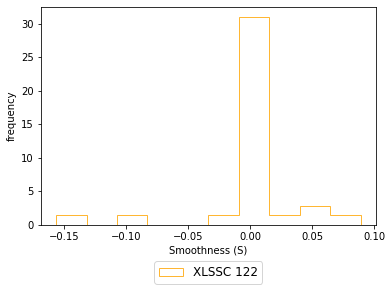

In [240]:
plt.hist(OGMembers_data['S'], density=1, edgecolor='orange', histtype='step', alpha=0.8, label = 'XLSSC 122')
plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')

plt.xlabel('Smoothness (S)')
plt.ylabel('frequency')

In [23]:
#function to find distance to 5 closest member

def phi_avg5(members, dim):
    
    
    phi_col = np.empty([len(members), ], dtype = float)
    
    
    for i in range (len(members)):
        
        
        target = members[i]
        
        #in_range = members[(members['V_r']>=(target['V_r']-1000)) & (members['V_r']<=(target['V_r']+1000))]
        
        #in_range_all = all_members[(all_members['V_r']>=(target['V_r']-1000)) & (all_members['V_r']<=(target['V_r']+1000))]
        
        #plus_Z = (target['V_r']+1000)/2.998e+5
        
        #minus_Z = (target['V_r']-1000)/2.998e+5
        
        plus_Z = max(members['zz'])
        minus_Z = min(members['zz'])
        
        if (len(members) >= 5): 
            
            c = SkyCoord(ra=target['ra']*u.degree, dec=target['dec']*u.degree)
            
            catalog = SkyCoord(ra=dim['ra']*u.degree, dec=dim['dec']*u.degree)
            
            #1st
            idx, d2d1, d3d = c.match_to_catalog_sky(catalog, nthneighbor=1)
            r1 = d2d1.arcsec * target['d_ang'] * constants.arcsec

            #2nd
            idx, d2d2, d3d = c.match_to_catalog_sky(catalog, nthneighbor=2)
            r2 = d2d2.arcsec * target['d_ang'] * constants.arcsec

            #3rd
            idx, d2d3, d3d = c.match_to_catalog_sky(catalog, nthneighbor=3)
            r3 = d2d3.arcsec * target['d_ang'] * constants.arcsec

            #4th
            idx, d2d4, d3d = c.match_to_catalog_sky(catalog, nthneighbor=4)
            r4 = d2d4.arcsec * target['d_ang'] * constants.arcsec

            #5th
            idx, d2d5, d3d = c.match_to_catalog_sky(catalog, nthneighbor=5)
            r5 = d2d5.arcsec * target['d_ang'] * constants.arcsec
            
            ####
            sumr = r1**2 + r2**2 + r3**2 + r4**2 + r5**2

            #area_all = ((cosmocalc(target['zz'], H0 = 69.6)['DCMR_Mpc'])**2)*(((m.pi)**2)/(180**2)) * (7966)
            avg_rho = target['avg_rho']
            
            phi = 1 / (avg_rho * sumr)
            
            phi_col[i] = phi
        
        
        
        
    return phi_col

In [24]:
OGMembers_data['phi'] = phi_avg5(OGMembers_data, dimMembers)


In [25]:
OGMembers_data

phot_id,Gini,M20,"F(G,M20)","S(G,M20)",C,A,S,sersic_cutout,sersic_psf,ra,dec,kron(f105),ekron(f105),0p8(f105),e0p8(f105),kron(f140),ekron(f140),0p8(f140),e0p8(f140),fwhm(asec),zz,zlo,zhi,chi,spec-id,mcode,snr,em-code,member1,member2,colour,d2d_5_1,avg_rho_1,d2d_5,avg_rho,sep_BCG,d_ang,R_mpc,rho,delta,log_delta,BCGsep_mpc,d_ang_1,R_mpc_1,rho_1,delta_1,log_delta_1,phi
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,str7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
146.0,0.47061407385916787,-1.3433392210998112,-0.6995262541749501,-0.04781621861229757,2.516624692410333,0.16317672786309842,0.0028551052071380425,0.8359274889073318,1.0412694010117967,34.444783,-3.772856,23.445999999999998,0.0372,24.1191,0.0378,22.9016,0.0304,23.6377,0.0405,0.895759,1.981413,1.9778799999999999,1.9856939999999998,0.9316639999999999,145,1,6.714639999999999,1,1.0,0.0,blue,26.11162986593104,47.68071642215873,22.216629373061103,95.36143284431746,63.27039259668711,1759.2925255187774,0.189492093728411,44.32389759706494,-0.5352010107752259,-0.33273482505529095,0.539651580932543,1759.2925255187774,0.22271368581033457,32.08679361945716,-0.3270488359410343,-0.17201645130241877,0.08317516356122207
240.0,0.544111141234312,-1.7246870065068014,-0.07144175538094188,-0.02806146408247656,2.9942829734708134,-0.06477465010358852,0.009861761830241724,1.4690106443940047,1.4690106443940047,34.45158,-3.770285,99.0,99.0,99.0,99.0,23.0151,0.0625,23.5353,0.077,0.612092,1.9773490000000002,1.275339,1.9799189999999998,1.13542,236,1,3.6847800000000004,1,0.984137,0.000669443,red,27.528370335840542,47.68071642215873,26.111629865931363,95.36143284431746,74.84541687719181,1759.6512766393612,0.22275910110267494,32.07371148222582,-0.6636616027510007,-0.4732235496896658,0.6385085063943611,1759.6512766393612,0.23484535673639592,28.857331988194048,-0.3947798155402058,-0.2180865964232536,0.06706860737029852
243.0,0.5049907015133024,-1.7626512584671599,-0.23877870539141144,-0.07206773042876591,2.731013355884195,0.03269493516456315,0.0,0.9361019844554965,5.258001755989425,34.422416999999996,-3.770003,23.7783,0.0393,24.0476,0.0353,22.6169,0.0283,22.8488,0.031,0.325858,1.977416,1.974125,1.9799080000000002,0.74305,240,1,10.0848,0,1.0,7.35868e-11,red,45.26627613801323,47.68071642215873,23.369032342347584,95.36143284431746,58.51408493074527,1759.6453852384627,0.1993612515236306,40.04410845609093,-0.5800806755759949,-0.376834138942437,0.49918375021520106,1759.6453852384627,0.3861666726497421,10.672607830184136,-0.7761651117887935,-0.6500722208607143,0.16581839961969455
300.0,0.5262552524058411,-1.719699681147167,-0.16328462155609946,-0.0450455557976735,2.763935862483167,0.029687281963913355,0.0,0.8830844140342652,4.353034512217102,34.435031,-3.7679480000000005,24.085,0.0539,24.3496,0.0423,22.5026,0.0233,22.7896,0.026000000000000002,0.338485,1.9868970000000001,1.9842830000000002,1.9890740000000002,0.769476,295,1,16.9164,0,1.0,1.13463e-22,red,28.84208405837951,47.68071642215873,18.652894507236958,95.36143284431746,33.07733823902072,1758.8039445078145,0.15905177927695233,62.91338722192038,-0.3402638221194748,-0.18062969990760758,0.2820478879897514,1758.8039445078145,0.24593420531922633,26.313720636034258,-0.4481265674983558,-0.25816051261285783,0.14439201910145769
305.0,0.600329345462422,-2.082245091909897,0.4546261087325476,-0.022106015767677956,3.524088195073759,0.02472485391861996,0.00794620468798356,1.1458361079713881,3.9063687693919165,34.447153,-3.768007,23.8277,0.0513,24.4884,0.0481,22.5249,0.0248,23.0674,0.0304,0.323371,1.9928669999999997,1.9901650000000002,1.995379,0.8747719999999999,298,1,11.8451,0,1.0,0.0,red,17.892732589349432,47.68071642215873,13.840356634258285,95.36143284431746,57.09300538953799,1758.2662746

(array([0.00657879, 0.00239229, 0.00179421, 0.00299036, 0.00059807,
        0.00059807, 0.00179421, 0.        , 0.        , 0.00059807]),
 array([ 13.43099795,  71.08758318, 128.7441684 , 186.40075362,
        244.05733885, 301.71392407, 359.37050929, 417.02709452,
        474.68367974, 532.34026496, 589.99685018]),
 <a list of 1 Patch objects>)

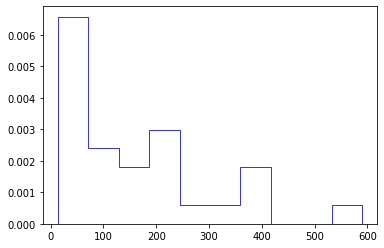

In [26]:
plt.hist(OGMembers_data['rho'], density=1, edgecolor='blue', histtype='step', alpha=0.8, label='d2d_5')


Text(34.467, -3.775, 'underdense')

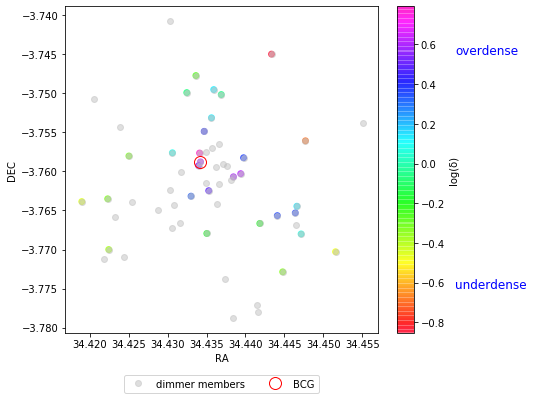

In [49]:
plt.rcParams["figure.figsize"] = (7,6)

plt.plot(dimMembers['ra'], dimMembers['dec'], 'o', color = 'silver', alpha=0.5, label='dimmer members')


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'] , c= OGMembers_data['log_delta'],
            cmap = 'gist_rainbow', alpha =0.6)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


cbar = plt.colorbar()
cbar.set_label('log(\u03B4)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol = 2)
plt.text(34.467, -3.745, 'overdense', color='blue', size = 12)
plt.text(34.467, -3.775, 'underdense', color='blue', size = 12)



Text(34.467, -3.775, 'underdense')

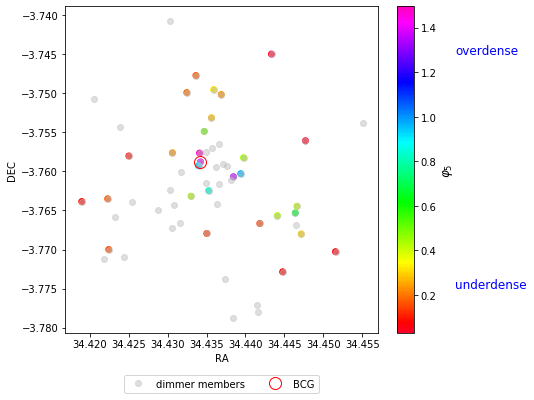

In [28]:
plt.rcParams["figure.figsize"] = (7,6)

plt.plot(dimMembers['ra'], dimMembers['dec'], 'o', color = 'silver', alpha=0.5, label='dimmer members')


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'] , c= OGMembers_data['phi'], 
            cmap = 'gist_rainbow', alpha =1)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


cbar = plt.colorbar()
cbar.set_label('$\u03C6_{5}$', size =12)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol = 2)
plt.text(34.467, -3.745, 'overdense', color='blue', size = 12)
plt.text(34.467, -3.775, 'underdense', color='blue', size = 12)



Text(34.467, -3.775, 'underdense')

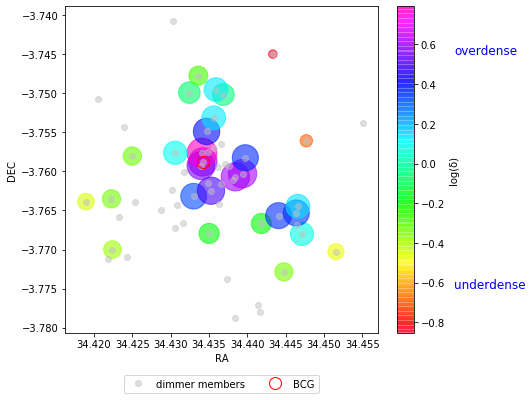

In [48]:
plt.rcParams["figure.figsize"] = (7,6)

plt.plot(dimMembers['ra'], dimMembers['dec'], 'o', color = 'silver', alpha=0.5, label='dimmer members')


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'] , c= OGMembers_data['log_delta'], s=(OGMembers_data['log_delta']+1)*500,
            cmap = 'gist_rainbow', alpha =0.6)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


cbar = plt.colorbar()
cbar.set_label('log(\u03B4)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol = 2)
plt.text(34.467, -3.745, 'overdense', color='blue', size = 12)
plt.text(34.467, -3.775, 'underdense', color='blue', size = 12)


Text(34.467, -3.775, 'underdense')

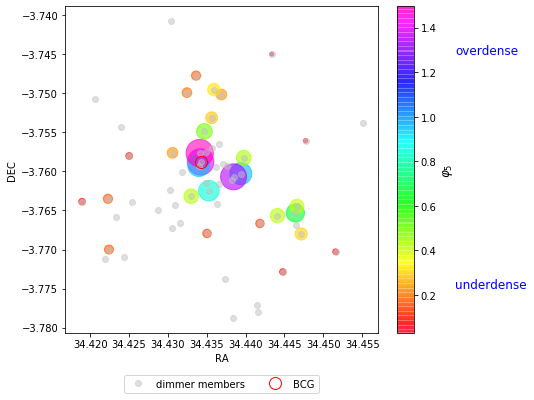

In [51]:
plt.rcParams["figure.figsize"] = (7,6)

plt.plot(dimMembers['ra'], dimMembers['dec'], 'o', color = 'silver', alpha=0.5, label='dimmer members')


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'] , c= OGMembers_data['phi'],  s=(OGMembers_data['phi'])*500,
            cmap = 'gist_rainbow', alpha =0.6)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


cbar = plt.colorbar()
cbar.set_label('$\u03C6_{5}$', size =12)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol = 2)
plt.text(34.467, -3.745, 'overdense', color='blue', size = 12)
plt.text(34.467, -3.775, 'underdense', color='blue', size = 12)



No handles with labels found to put in legend.


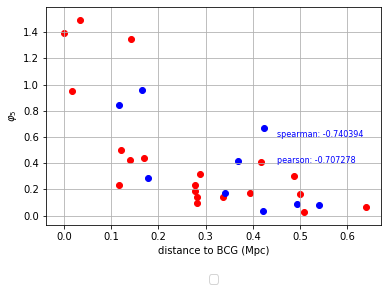

In [52]:
colour = ['#778B94', '#8439DA', '#322D14', '#FB7DE6', '#5BD792', '#EA5E66', '#304588', '#50E8BD', '#AB5DEA', '#58AE3F', '#2D8E15', '#5F7E8C', '#4AB612', '#AE798C', '#86142C', '#54279D', '#9DB7F1', '#5A0A36', '#9DACE1', '#DF66DC', '#C5E31A', '#538DCA', '#27BC8C', '#6468DB', '#C58EA2', '#25F829', '#AA4154', '#8E1F81', '#239DCF']

plt.rcParams["figure.figsize"] = (6,4)




for i in range(len(OGMembers_data)):
    
    plt.scatter((OGMembers_data['BCGsep_mpc'][i]), (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))
    

plt.text(0.45, 0.6, 'spearman: %f' %(stats.spearmanr(OGMembers_data['BCGsep_mpc'], OGMembers_data['phi'])[0]), color='blue', size = 8)
plt.text(0.45, 0.4, 'pearson: %f' %(stats.pearsonr(OGMembers_data['BCGsep_mpc'], OGMembers_data['phi'])[0]), color='blue', size = 8)


plt.xlabel('distance to BCG (Mpc)')
plt.ylabel('$\u03C6_{5}$')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')



In [30]:
plt.rcParams["figure.figsize"] = (7,7)

zout, wout = loess_2d(OGMembers_data['ra'], OGMembers_data['dec'], OGMembers_data['phi'], frac=1)


plot_velfield(OGMembers_data['ra'], OGMembers_data['dec'], OGMembers_data['phi'], vmin=min(OGMembers_data['phi']), vmax=max(OGMembers_data['phi']), cmap= 'PiYG', colorbar=True, label= '$\u03C6_{5}$', alpha=1)


plt.plot(dimMembers['ra'], dimMembers['dec'], 'o', color = 'silver', alpha=0.5, label='dimmer members')


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'], color = 'black', alpha =1)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol = 2)
plt.text(34.457, -3.743, 'overdense', color='blue', size = 12)
plt.text(34.457, -3.773, 'underdense', color='blue', size = 12)

NameError: name 'loess_2d' is not defined

In [31]:

plt.rcParams["figure.figsize"] = (7,7)



z = np.array(OGMembers_data['phi'])

assert len(z) == (len(OGMembers_data['ra']) * len(OGMembers_data['dec']))

z = z.reshape((len(OGMembers_data['ra']), len(OGMembers_data['dec'])))


x1, y1 = np.meshgrid(OGMembers_data['ra'], OGMembers_data['dec'])
plt.contour(x1, y1, z, cmap= 'PiYG', colorbar=True, label= '$\u03C6_{5}$', alpha=1)


#plt.contour(OGMembers_data['ra'], OGMembers_data['dec'], OGMembers_data['phi'], cmap= 'PiYG', colorbar=True, label= '$\u03C6_{5}$', alpha=1)


plt.plot(dimMembers['ra'], dimMembers['dec'], 'o', color = 'silver', alpha=0.5, label='dimmer members')


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'], color = 'black', alpha =1)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol = 2)
plt.text(34.457, -3.743, 'overdense', color='blue', size = 12)
plt.text(34.457, -3.773, 'underdense', color='blue', size = 12)

AssertionError: 

Text(34.457, -3.773, 'underdense')

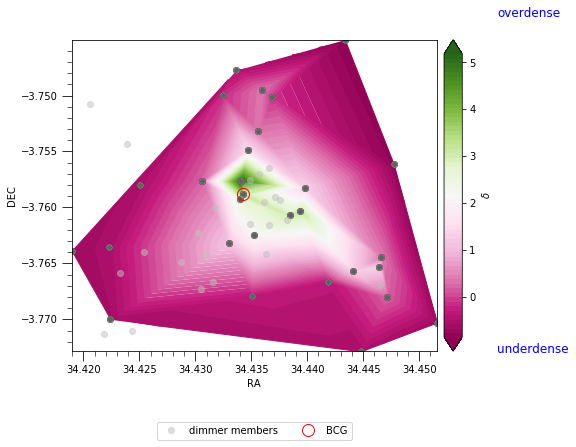

In [223]:
plt.rcParams["figure.figsize"] = (7,7)

zout, wout = loess_2d(OGMembers_data['ra'], OGMembers_data['dec'], OGMembers_data['log_delta'], frac=1)


plot_velfield(OGMembers_data['ra'], OGMembers_data['dec'], OGMembers_data['delta'], vmin=min(OGMembers_data['delta']), vmax=max(OGMembers_data['delta']), cmap= 'PiYG', colorbar=True, label= '$\u03B4$', alpha=1)


plt.plot(dimMembers['ra'], dimMembers['dec'], 'o', color = 'silver', alpha=0.5, label='dimmer members')


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'], color = 'black', alpha =1)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol = 2)
plt.text(34.457, -3.743, 'overdense', color='blue', size = 12)
plt.text(34.457, -3.773, 'underdense', color='blue', size = 12)

No handles with labels found to put in legend.


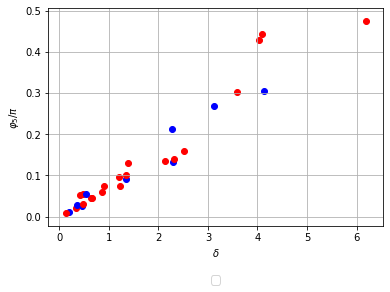

In [53]:
colour = ['#778B94', '#8439DA', '#322D14', '#FB7DE6', '#5BD792', '#EA5E66', '#304588', '#50E8BD', '#AB5DEA', '#58AE3F', '#2D8E15', '#5F7E8C', '#4AB612', '#AE798C', '#86142C', '#54279D', '#9DB7F1', '#5A0A36', '#9DACE1', '#DF66DC', '#C5E31A', '#538DCA', '#27BC8C', '#6468DB', '#C58EA2', '#25F829', '#AA4154', '#8E1F81', '#239DCF']

plt.rcParams["figure.figsize"] = (6,4)




for i in range(len(OGMembers_data)):
    
    plt.scatter((OGMembers_data['delta'][i]+1), (OGMembers_data['phi'][i]/m.pi), color = (OGMembers_data['colour'][i]))
    



plt.xlabel('$\u03B4$')
plt.ylabel('$\u03C6_{5}/\u03C0$')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')



No handles with labels found to put in legend.


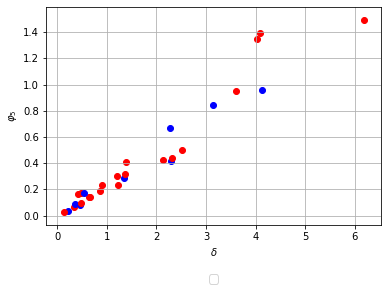

In [35]:
colour = ['#778B94', '#8439DA', '#322D14', '#FB7DE6', '#5BD792', '#EA5E66', '#304588', '#50E8BD', '#AB5DEA', '#58AE3F', '#2D8E15', '#5F7E8C', '#4AB612', '#AE798C', '#86142C', '#54279D', '#9DB7F1', '#5A0A36', '#9DACE1', '#DF66DC', '#C5E31A', '#538DCA', '#27BC8C', '#6468DB', '#C58EA2', '#25F829', '#AA4154', '#8E1F81', '#239DCF']

plt.rcParams["figure.figsize"] = (6,4)




for i in range(len(OGMembers_data)):
    
    plt.scatter((OGMembers_data['delta'][i]+1), (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))
    



plt.xlabel('$\u03B4$')
plt.ylabel('$\u03C6_{5}$')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')



Text(34.459, -3.773, 'underdense')

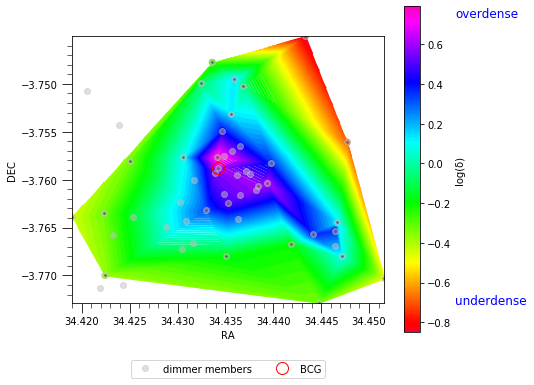

In [101]:
plt.rcParams["figure.figsize"] = (7,6)

zout, wout = loess_2d(OGMembers_data['ra'], OGMembers_data['dec'], OGMembers_data['log_delta'], frac=1)


plot_velfield(OGMembers_data['ra'], OGMembers_data['dec'], OGMembers_data['log_delta'], vmin=min(OGMembers_data['log_delta']), vmax=max(OGMembers_data['log_delta']), cmap= 'gist_rainbow', alpha=1)


plt.plot(dimMembers['ra'], dimMembers['dec'], 'o', color = 'silver', alpha=0.5, label='dimmer members')


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'] , c= OGMembers_data['log_delta'], 
            cmap = 'gist_rainbow', alpha =1)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


cbar = plt.colorbar()
cbar.set_label('log(\u03B4)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol = 2)
plt.text(34.459, -3.743, 'overdense', color='blue', size = 12)
plt.text(34.459, -3.773, 'underdense', color='blue', size = 12)

Text(34.457, -3.773, 'underdense')

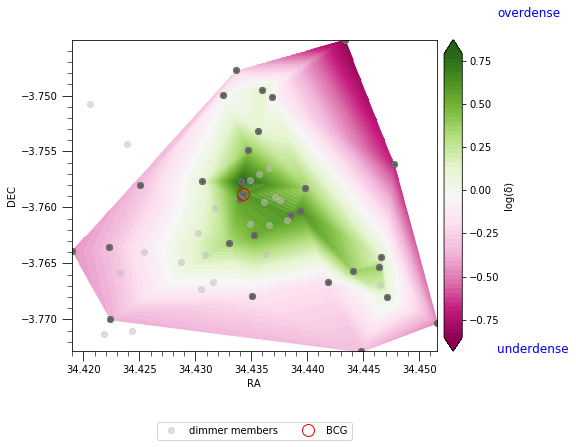

In [121]:
plt.rcParams["figure.figsize"] = (7,7)

zout, wout = loess_2d(OGMembers_data['ra'], OGMembers_data['dec'], OGMembers_data['log_delta'], frac=1)


plot_velfield(OGMembers_data['ra'], OGMembers_data['dec'], OGMembers_data['log_delta'], vmin=min(OGMembers_data['log_delta']), vmax=max(OGMembers_data['log_delta']), cmap= 'PiYG', colorbar=True, label= 'log(\u03B4)', alpha=1)


plt.plot(dimMembers['ra'], dimMembers['dec'], 'o', color = 'silver', alpha=0.5, label='dimmer members')


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'], color = 'black', alpha =1)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol = 2)
plt.text(34.457, -3.743, 'overdense', color='blue', size = 12)
plt.text(34.457, -3.773, 'underdense', color='blue', size = 12)

Text(34.476, -3.775, 'underdense')

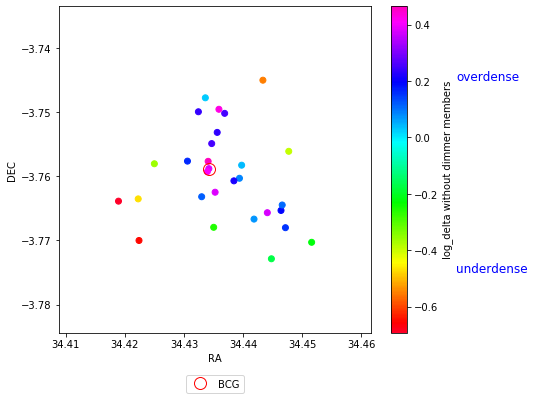

In [34]:
plt.rcParams["figure.figsize"] = (7,6)



plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'] , c= OGMembers_data['log_delta_1'], 
            cmap = 'gist_rainbow', alpha =1)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


cbar = plt.colorbar()
cbar.set_label('log_delta without dimmer members')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol = 2)
plt.text(34.476, -3.745, 'overdense', color='blue', size = 12)
plt.text(34.476, -3.775, 'underdense', color='blue', size = 12)


Text(34.467, -3.775, 'underdense')

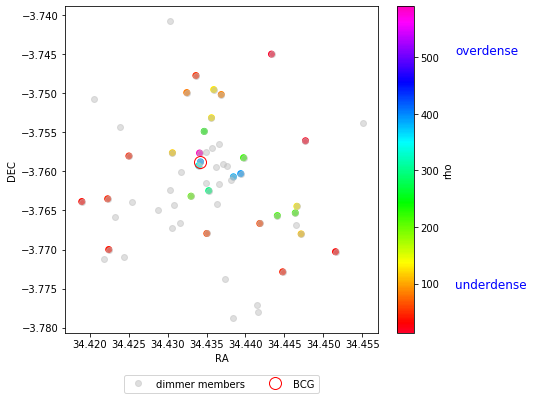

In [35]:
plt.rcParams["figure.figsize"] = (7,6)

plt.plot(dimMembers['ra'], dimMembers['dec'], 'o', color = 'silver', alpha=0.5, label='dimmer members')


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'] , c= OGMembers_data['rho'], 
            cmap = 'gist_rainbow', alpha =1)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


cbar = plt.colorbar()
cbar.set_label('rho')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol = 2)
plt.text(34.467, -3.745, 'overdense', color='blue', size = 12)
plt.text(34.467, -3.775, 'underdense', color='blue', size = 12)



Text(34.476, -3.775, 'underdense')

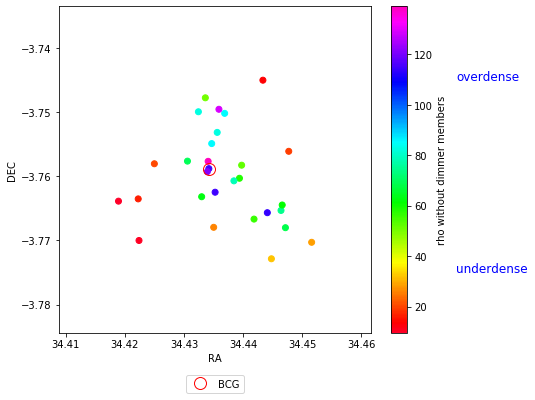

In [36]:
plt.rcParams["figure.figsize"] = (7,6)



plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'] , c= OGMembers_data['rho_1'], 
            cmap = 'gist_rainbow', alpha =1)


plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


cbar = plt.colorbar()
cbar.set_label('rho without dimmer members')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol = 2)
plt.text(34.476, -3.745, 'overdense', color='blue', size = 12)
plt.text(34.476, -3.775, 'underdense', color='blue', size = 12)

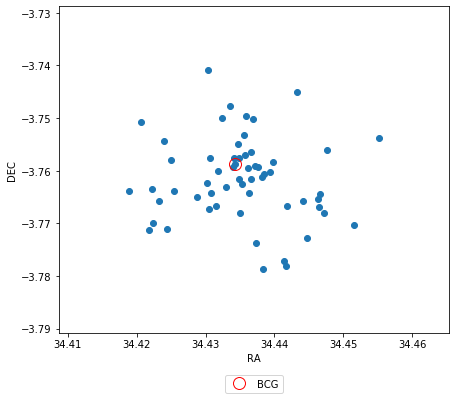

In [37]:
plt.rcParams["figure.figsize"] = (7,6)


plt.scatter(dimMembers['ra'], dimMembers['dec'])

plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol = 2)

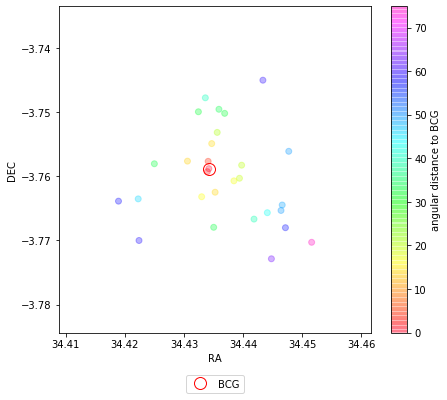

In [29]:
plt.rcParams["figure.figsize"] = (7,6)


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'] , c= OGMembers_data['sep_BCG'], 
            cmap = 'gist_rainbow', alpha =0.3)

plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


cbar = plt.colorbar()
cbar.set_label('angular distance to BCG')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol = 2)


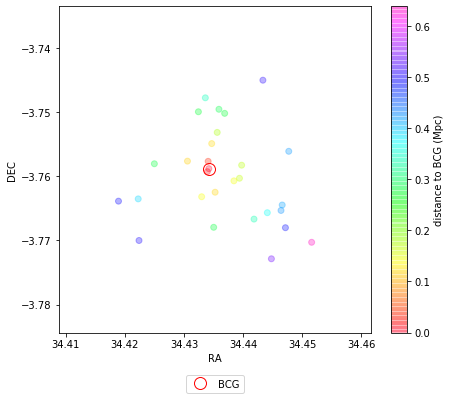

In [30]:
plt.rcParams["figure.figsize"] = (7,6)


plt.scatter(OGMembers_data['ra'], OGMembers_data['dec'] , c= OGMembers_data['BCGsep_mpc'], 
            cmap = 'gist_rainbow', alpha =0.3)

plt.plot(BCG['ra'], BCG['dec'], 'o', color = 'red',  markersize=12, fillstyle='none', label ='BCG')


cbar = plt.colorbar()
cbar.set_label('distance to BCG (Mpc)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol = 2)


In [30]:
##########Propreties wrt to distance to BCG

In [54]:
emils_data = Table([[529,455,661,1036,300,920,305,1057,1065,608,243,847,375,735,1223,347,146,497,604,1147,407,731,653,726,454,808,554,434], 
                    [7.56,2.94,3.07,5.03,2.57,6.39,7.30,1.63,0.94,1.21,2.17,1.94,2.89,2.60,2.19,2.06,0.90,2.44,0.37,0.86,2.75,1.93,4.15,1.00,0.45,0.75,0.36,2.61]], 
                   names = ('phot_id', 'emil_n'))

In [55]:
weird_id = [146, 240, 434, 454, 455, 529, 554, 604, 661, 726, 808, 1065]
weird_id = Column(weird_id, name='phot_id')
weird = Table()
weird['phot_id'] = weird_id

In [56]:
emils_data

phot_id,emil_n
int64,float64
529,7.56
455,2.94
661,3.07
1036,5.03
300,2.57
920,6.39
305,7.3
1057,1.63
1065,0.94


In [57]:
OG_justPos = Table([OGMembers_data['phot_id'], OGMembers_data['phi'], OGMembers_data['rho'], OGMembers_data['sep_BCG'], OGMembers_data['log_delta'], OGMembers_data['BCGsep_mpc']])

In [58]:
weird_members = join(weird_members, OG_justPos, 'phot_id')
OGMembers_age_data = join(OGMembers_age_data, OG_justPos, 'phot_id')

In [59]:
weird_members

phot_id,Gini,M20,"F(G,M20)","S(G,M20)",C,A,S,sersic_cutout,sersic_psf,ra,dec,kron(f105),ekron(f105),0p8(f105),e0p8(f105),kron(f140),ekron(f140),0p8(f140),e0p8(f140),fwhm(asec),zz,zlo,zhi,chi,spec-id,mcode,snr,em-code,member1,member2,phi,rho,sep_BCG,log_delta,BCGsep_mpc
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64
146.0,0.47061407385916787,-1.3433392210998112,-0.6995262541749501,-0.04781621861229757,2.516624692410333,0.16317672786309842,0.0028551052071380425,0.8359274889073318,1.0412694010117967,34.444783,-3.772856,23.445999999999998,0.0372,24.1191,0.0378,22.9016,0.0304,23.6377,0.0405,0.895759,1.981413,1.9778799999999999,1.9856939999999998,0.9316639999999999,145,1,6.714639999999999,1,1.0,0.0,0.08317516356122207,44.32389759706494,63.27039259668711,-0.33273482505529095,0.539651580932543
240.0,0.544111141234312,-1.7246870065068014,-0.07144175538094188,-0.02806146408247656,2.9942829734708134,-0.06477465010358852,0.009861761830241724,1.4690106443940047,1.4690106443940047,34.45158,-3.770285,99.0,99.0,99.0,99.0,23.0151,0.0625,23.5353,0.077,0.612092,1.9773490000000002,1.275339,1.9799189999999998,1.13542,236,1,3.6847800000000004,1,0.984137,0.000669443,0.06706860737029852,32.07371148222582,74.84541687719181,-0.4732235496896658,0.6385085063943611
434.0,0.49730776261437015,-1.822435598480205,-0.23537870531208593,-0.08798386320052204,2.9735133426183644,-0.01802349251108937,0.004381814807713906,1.1599714742048834,2.5463105906811982,34.446607,-3.764467,25.0249,0.125,25.999000000000002,0.1398,23.8874,0.0527,24.6204,0.0668,0.806517,1.9773459999999998,1.147973,2.205463,0.801847,428,1,3.05189,0,0.617113,0.00543194,0.4063696833336997,131.53415784633998,48.97336038177668,0.13966578065431398,0.4177932755618631
454.0,0.3859713858056187,-1.303887030739236,-1.1458479279598968,-0.12612862532519134,2.187184790857658,0.09823212038542133,-0.0073210430550138955,0.5813901304483415,4.737374999410976,34.418951,-3.763868,24.0581,0.0576,24.9001,0.0625,23.6887,0.0517,24.4548,0.0663,0.9550770000000001,1.970551,1.9674509999999998,1.973529,0.708695,452,1,3.9098699999999997,1,1.0,0.0,0.08938343202364749,33.99707925571158,57.79230446229336,-0.4479311601957563,0.4931942398049278
455.0,0.5058731199577085,-1.8176160611251324,-0.19632012584962633,-0.07883424373826209,2.99054747130974,0.15591873954237243,0.00677887200075365,1.2223994770041529,3.377396844261361,34.422282,-3.7635129999999997,23.1633,0.0304,23.8435,0.0312,21.9504,0.0177,22.5527,0.0233,0.415199,1.980749,1.9742400000000002,1.9812990000000001,0.695897,451,1,22.3192,0,0.9999979999999999,5.06855e-10,0.17205779216995273,45.09041604931449,46.107251148871725,-0.32528852533574676,0.39327530131514116
529.0,0.5874562558064707,-1.88384049376086,0.25340992841830623,-0.007272135384353673,3.796923955528074,0.03709603447418732,-0.009700620522204976,3.372963544142261,3.372963544142261,34.434215,-3.758796,22.0918,0.0259,23.8068,0.0312,20.6356,0.0102,22.3685,0.0213,0.49473100000000003,1.979632,1.9753459999999998,1.9813939999999999,0.7163229999999999,526,1,34.0853,0,1.0,1.01488e-16,1.3930238997926818,390.80292556939037,0.0,0.612585038311737,0.0
554.0,0.44922324221672577,-1.194343358229005,-0.908665003774507,-0.04828271699927328,2.2904950431512177,0.11553485680017893,0.08915659941551578,0.537504289752948,1.384269931378524,34.435274,-3.762475,24.2755,0.0519,24.5042,0.0463,23.9599,0.0492,24.2219,0.0524,0.668768,1.96271,1.9614619999999998,1.9636259999999999,0.7268560000000001,547,1,3.64665,1,0.9996139999999999,1.6527899999999998e-29,0.8466761956512516,298.7551218941326,13.779912938398859,0.49594259172099,0.11764159501035586
604.0,0.42988099581672756,-1.3298342375885386,-0.9105139440583416,-0.08626477316624662,2.4356827991946868,0.006844642656855087,0.01397496435439597,0.5159834576787939,0.01985420557

In [60]:
compareOG_data = join(OGMembers_data, emils_data, keys='phot_id')



In [61]:
compareAge_data = join(OGMembers_age_data, emils_data, keys='phot_id')

In [62]:
very_old1 = compareAge_data[compareAge_data['age_class'] == 'very_old']
old1 = compareAge_data[compareAge_data['age_class'] == 'old']
star_forming1 = compareAge_data[compareAge_data['age_class'] == 'star_forming']
young1 = compareAge_data[compareAge_data['age_class'] == 'young']
dusty1_726 = compareAge_data[compareAge_data['age_class'] == 'dusty']

In [63]:
members_merger1 = compareOG_data[(compareOG_data['Gini'] >= (-0.14*compareOG_data['M20']) + 0.33)]
members_ellip1 = compareOG_data[(compareOG_data['Gini'] < (-0.14*compareOG_data['M20']) + 0.33) & (compareOG_data['Gini'] >= (0.14*compareOG_data['M20']) + 0.80)]
members_spiral1 = compareOG_data[(compareOG_data['Gini'] < (-0.14*compareOG_data['M20']) + 0.33) & (compareOG_data['Gini'] < (0.14*compareOG_data['M20']) + 0.80)]
weird_members1 = join(compareOG_data, weird, 'phot_id')

In [64]:
members_ellipCA1 = compareOG_data[(compareOG_data['C'] >= 3.15) & (np.abs(compareOG_data['A']) < 0.075)]
members_mergerCA1 = compareOG_data[(compareOG_data['C'] < 3.15) & (np.abs(compareOG_data['A']) >= 0.075)]
members_otherCA1 = compareOG_data[(compareOG_data['C'] < 3.15) & (np.abs(compareOG_data['A']) < 0.075)]


In [65]:
very_old = OGMembers_age_data[OGMembers_age_data['age_class'] == 'very_old']
old = OGMembers_age_data[OGMembers_age_data['age_class'] == 'old']
star_forming = OGMembers_age_data[OGMembers_age_data['age_class'] == 'star_forming']
young = OGMembers_age_data[OGMembers_age_data['age_class'] == 'young']
dusty_726 = OGMembers_age_data[OGMembers_age_data['age_class'] == 'dusty']

In [66]:
members_merger = OGMembers_data[(OGMembers_data['Gini'] >= (-0.14*OGMembers_data['M20']) + 0.33)]
members_ellip = OGMembers_data[(OGMembers_data['Gini'] < (-0.14*OGMembers_data['M20']) + 0.33) & (OGMembers_data['Gini'] >= (0.14*OGMembers_data['M20']) + 0.80)]
members_spiral = OGMembers_data[(OGMembers_data['Gini'] < (-0.14*OGMembers_data['M20']) + 0.33) & (OGMembers_data['Gini'] < (0.14*OGMembers_data['M20']) + 0.80)]


In [67]:
compareAge_data[compareAge_data['phot_id'] == 240]

phot_id,Gini,M20,"F(G,M20)","S(G,M20)",C,A,S,sersic_cutout,sersic_psf,ra_1,dec_1,kron(f105),ekron(f105),0p8(f105),e0p8(f105),kron(f140),ekron(f140),0p8(f140),e0p8(f140),fwhm(asec),zz,zlo,zhi,chi,spec-id,mcode,snr,em-code,member1,member2,Ariane_ID,ra_2,dec_2,f140w_mag,Quality,age_class,phi,rho,sep_BCG,log_delta,BCGsep_mpc,emil_n
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,float64,float64,float64,str7,str12,float64,float64,float64,float64,float64,float64


In [68]:
compareOG_data[compareOG_data['phot_id'] == 375]

phot_id,Gini,M20,"F(G,M20)","S(G,M20)",C,A,S,sersic_cutout,sersic_psf,ra,dec,kron(f105),ekron(f105),0p8(f105),e0p8(f105),kron(f140),ekron(f140),0p8(f140),e0p8(f140),fwhm(asec),zz,zlo,zhi,chi,spec-id,mcode,snr,em-code,member1,member2,colour,d2d_5_1,avg_rho_1,d2d_5,avg_rho,sep_BCG,d_ang,R_mpc,rho,delta,log_delta,BCGsep_mpc,d_ang_1,R_mpc_1,rho_1,delta_1,log_delta_1,phi,emil_n
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,str7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
375.0,0.530769676442604,-1.862401218359155,-0.0420460572862158,-0.06041178967374461,3.087450289641537,0.008955019407012632,-0.006453281954315859,1.2250703402546128,41.30942168207532,34.444096,-3.7656669999999997,23.5689,0.0386,24.2904,0.0405,23.0819,0.0324,23.6346,0.0394,0.369915,1.962563,1.9601810000000002,1.9645580000000002,0.819581,372,1,7.98415,1,0.9854799999999999,4.1122e-09,blue,13.840356634257645,47.68071642215873,10.001220870046465,95.36143284431746,43.26361915954978,1760.9322930644826,0.08538282957994053,218.31272232710157,1.2893188138595666,0.3597062773658967,0.3693519291004446,1760.9322930644826,0.11815845557092768,113.99623819854364,1.390824776818286,0.37854774790604073,0.419600998252804,2.89


In [69]:
members_ellipCA = OGMembers_data[(OGMembers_data['C'] >= 3.15) & (np.abs(OGMembers_data['A']) < 0.075)]
members_mergerCA = OGMembers_data[(OGMembers_data['C'] < 3.15) & (np.abs(OGMembers_data['A']) >= 0.075)]
members_otherCA = OGMembers_data[(OGMembers_data['C'] < 3.15) & (np.abs(OGMembers_data['A']) < 0.075)]


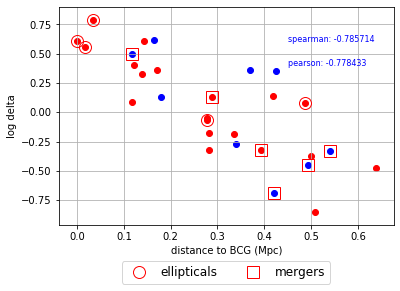

In [70]:
colour = ['#778B94', '#8439DA', '#322D14', '#FB7DE6', '#5BD792', '#EA5E66', '#304588', '#50E8BD', '#AB5DEA', '#58AE3F', '#2D8E15', '#5F7E8C', '#4AB612', '#AE798C', '#86142C', '#54279D', '#9DB7F1', '#5A0A36', '#9DACE1', '#DF66DC', '#C5E31A', '#538DCA', '#27BC8C', '#6468DB', '#C58EA2', '#25F829', '#AA4154', '#8E1F81', '#239DCF']

plt.rcParams["figure.figsize"] = (6,4)

plt.plot((members_ellipCA['BCGsep_mpc']), (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((members_mergerCA['BCGsep_mpc']), (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_data)):
    
    plt.scatter((OGMembers_data['BCGsep_mpc'][i]), (OGMembers_data['log_delta'][i]), color = (OGMembers_data['colour'][i]))
    

plt.text(0.45, 0.6, 'spearman: %f' %(stats.spearmanr(OGMembers_data['BCGsep_mpc'], OGMembers_data['log_delta'])[0]), color='blue', size = 8)
plt.text(0.45, 0.4, 'pearson: %f' %(stats.pearsonr(OGMembers_data['BCGsep_mpc'], OGMembers_data['log_delta'])[0]), color='blue', size = 8)


plt.xlabel('distance to BCG (Mpc)')
plt.ylabel('log delta')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')



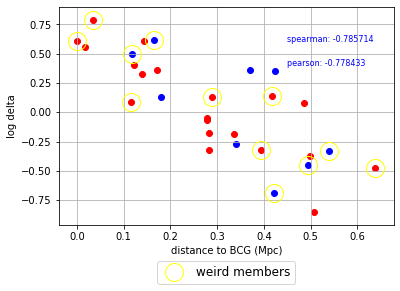

In [71]:
colour = ['#778B94', '#8439DA', '#322D14', '#FB7DE6', '#5BD792', '#EA5E66', '#304588', '#50E8BD', '#AB5DEA', '#58AE3F', '#2D8E15', '#5F7E8C', '#4AB612', '#AE798C', '#86142C', '#54279D', '#9DB7F1', '#5A0A36', '#9DACE1', '#DF66DC', '#C5E31A', '#538DCA', '#27BC8C', '#6468DB', '#C58EA2', '#25F829', '#AA4154', '#8E1F81', '#239DCF']

plt.rcParams["figure.figsize"] = (6,4)


plt.plot(weird_members['BCGsep_mpc'], (weird_members['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')



for i in range(len(OGMembers_data)):
    
    plt.scatter((OGMembers_data['BCGsep_mpc'][i]), (OGMembers_data['log_delta'][i]), color = (OGMembers_data['colour'][i]))
    

plt.text(0.45, 0.6, 'spearman: %f' %(stats.spearmanr(OGMembers_data['BCGsep_mpc'], OGMembers_data['log_delta'])[0]), color='blue', size = 8)
plt.text(0.45, 0.4, 'pearson: %f' %(stats.pearsonr(OGMembers_data['BCGsep_mpc'], OGMembers_data['log_delta'])[0]), color='blue', size = 8)


plt.xlabel('distance to BCG (Mpc)')
plt.ylabel('log delta')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')



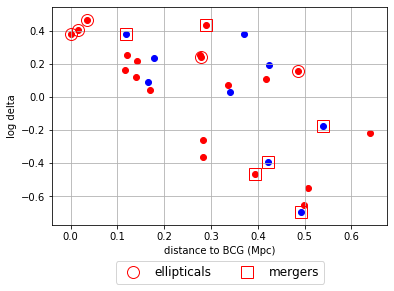

In [72]:
colour = ['#778B94', '#8439DA', '#322D14', '#FB7DE6', '#5BD792', '#EA5E66', '#304588', '#50E8BD', '#AB5DEA', '#58AE3F', '#2D8E15', '#5F7E8C', '#4AB612', '#AE798C', '#86142C', '#54279D', '#9DB7F1', '#5A0A36', '#9DACE1', '#DF66DC', '#C5E31A', '#538DCA', '#27BC8C', '#6468DB', '#C58EA2', '#25F829', '#AA4154', '#8E1F81', '#239DCF']

plt.rcParams["figure.figsize"] = (6,4)

plt.plot((members_ellipCA['BCGsep_mpc']), (members_ellipCA['log_delta_1']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((members_mergerCA['BCGsep_mpc']), (members_mergerCA['log_delta_1']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
#plt.plot(weird_members['BCGsep_mpc'], (weird_members['log_delta_1']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')



for i in range(len(OGMembers_data)):
    
    plt.scatter((OGMembers_data['BCGsep_mpc'][i]), (OGMembers_data['log_delta_1'][i]), color = (OGMembers_data['colour'][i]))
    

#plt.text(0.45, 0.6, 'spearman: %f' %(stats.spearmanr(OGMembers_data['BCGsep_mpc'], OGMembers_data['log_delta_1'])[0]), color='blue', size = 8)
#plt.text(0.45, 0.4, 'pearson: %f' %(stats.pearsonr(OGMembers_data['BCGsep_mpc'], OGMembers_data['log_delta_1'])[0]), color='blue', size = 8)


plt.xlabel('distance to BCG (Mpc)')
plt.ylabel('log delta')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')



No handles with labels found to put in legend.


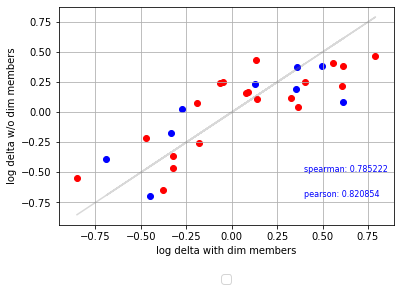

In [73]:
plt.rcParams["figure.figsize"] = (6,4)

#plt.plot((members_ellipCA['BCGsep_mpc']), (members_ellipCA['log_delta_1']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
#plt.plot((members_mergerCA['BCGsep_mpc']), (members_mergerCA['log_delta_1']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
#plt.plot(weird_members['BCGsep_mpc'], (weird_members['log_delta_1']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

plt.plot((OGMembers_data['log_delta']), (OGMembers_data['log_delta']), color='grey', alpha=0.3)


for i in range(len(OGMembers_data)):
    
    plt.scatter((OGMembers_data['log_delta'][i]), (OGMembers_data['log_delta_1'][i]), color = (OGMembers_data['colour'][i]))
    

plt.text(0.4, -0.5, 'spearman: %f' %(stats.spearmanr(OGMembers_data['log_delta'], OGMembers_data['log_delta_1'])[0]), color='blue', size = 8)
plt.text(0.4, -0.7, 'pearson: %f' %(stats.pearsonr(OGMembers_data['log_delta'], OGMembers_data['log_delta_1'])[0]), color='blue', size = 8)


plt.xlabel('log delta with dim members')
plt.ylabel('log delta w/o dim members')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')



In [74]:
stats.spearmanr(OGMembers_data['BCGsep_mpc'], OGMembers_data['log_delta'])

SpearmanrResult(correlation=-0.7857142857142855, pvalue=4.4256921571282776e-07)

In [75]:
stats.pearsonr(OGMembers_data['BCGsep_mpc'], OGMembers_data['log_delta'])

(-0.7784325649160907, 6.630927962480854e-07)

In [76]:
print('spearman: %f' %(stats.spearmanr(OGMembers_data['BCGsep_mpc'], OGMembers_data['log_delta'])[0]))

spearman: -0.785714


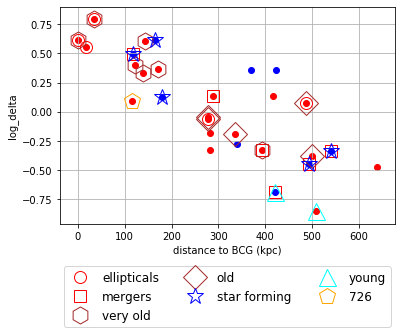

In [77]:

plt.rcParams["figure.figsize"] = (6,4)

plt.plot((members_ellipCA['BCGsep_mpc']*1000), (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((members_mergerCA['BCGsep_mpc']*1000), (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

plt.plot(very_old['BCGsep_mpc']*1000, (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
plt.plot(old['BCGsep_mpc']*1000, (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
plt.plot(star_forming['BCGsep_mpc']*1000, (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
plt.plot(young['BCGsep_mpc']*1000, (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
plt.plot(dusty_726['BCGsep_mpc']*1000, (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(OGMembers_data)):
    
    plt.scatter((OGMembers_data['BCGsep_mpc'][i]*1000), (OGMembers_data['log_delta'][i]), color = (OGMembers_data['colour'][i]))
    





plt.xlabel('distance to BCG (kpc)')
plt.ylabel('log_delta')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.5), ncol = 3, fontsize = 'large')



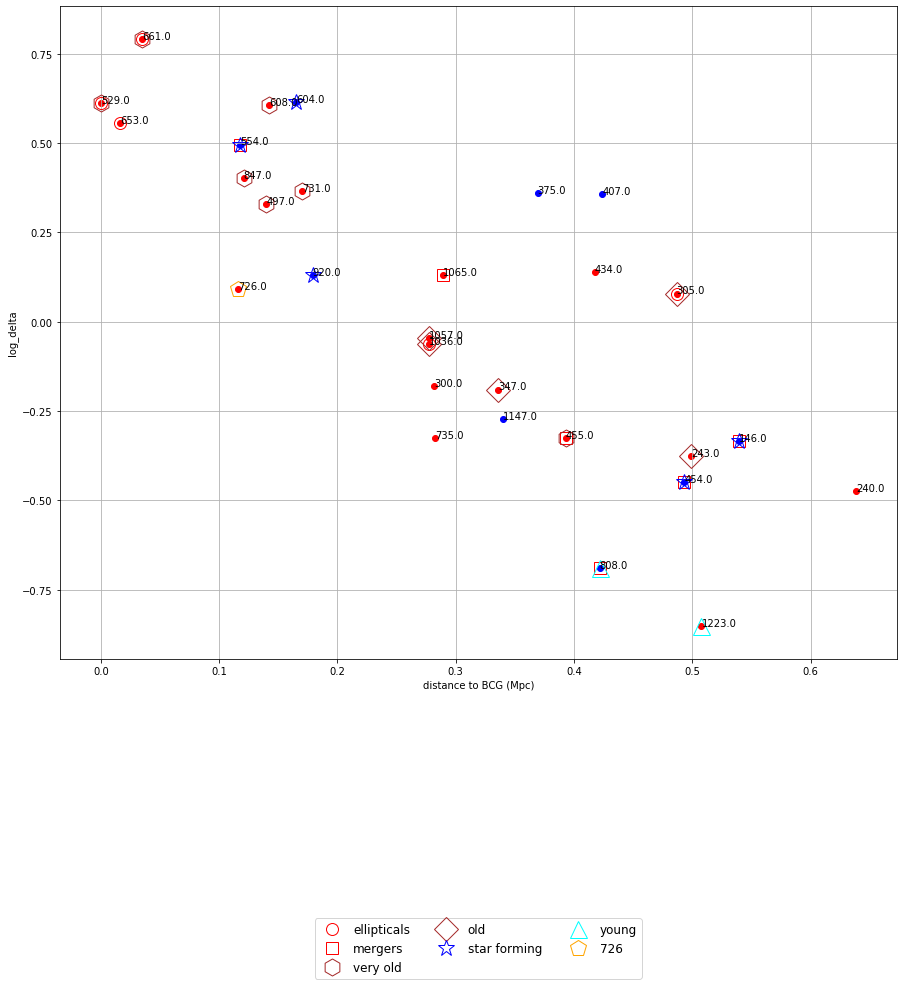

In [54]:
plt.rcParams["figure.figsize"] = (15,12)


plt.plot((members_ellipCA['BCGsep_mpc']), (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot((members_mergerCA['BCGsep_mpc']), (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

plt.plot(very_old['BCGsep_mpc'], (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
plt.plot(old['BCGsep_mpc'], (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
plt.plot(star_forming['BCGsep_mpc'], (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
plt.plot(young['BCGsep_mpc'], (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
plt.plot(dusty_726['BCGsep_mpc'], (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(OGMembers_data)):
    
    plt.scatter((OGMembers_data['BCGsep_mpc'][i]), (OGMembers_data['log_delta'][i]), color = (OGMembers_data['colour'][i]))
    
    plt.text(np.abs(OGMembers_data['BCGsep_mpc'][i]), (OGMembers_data['log_delta'][i]), str(OGMembers_data['phot_id'][i]), color='black')






plt.xlabel('distance to BCG (Mpc)')
plt.ylabel('log_delta')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.5), ncol = 3, fontsize = 'large')



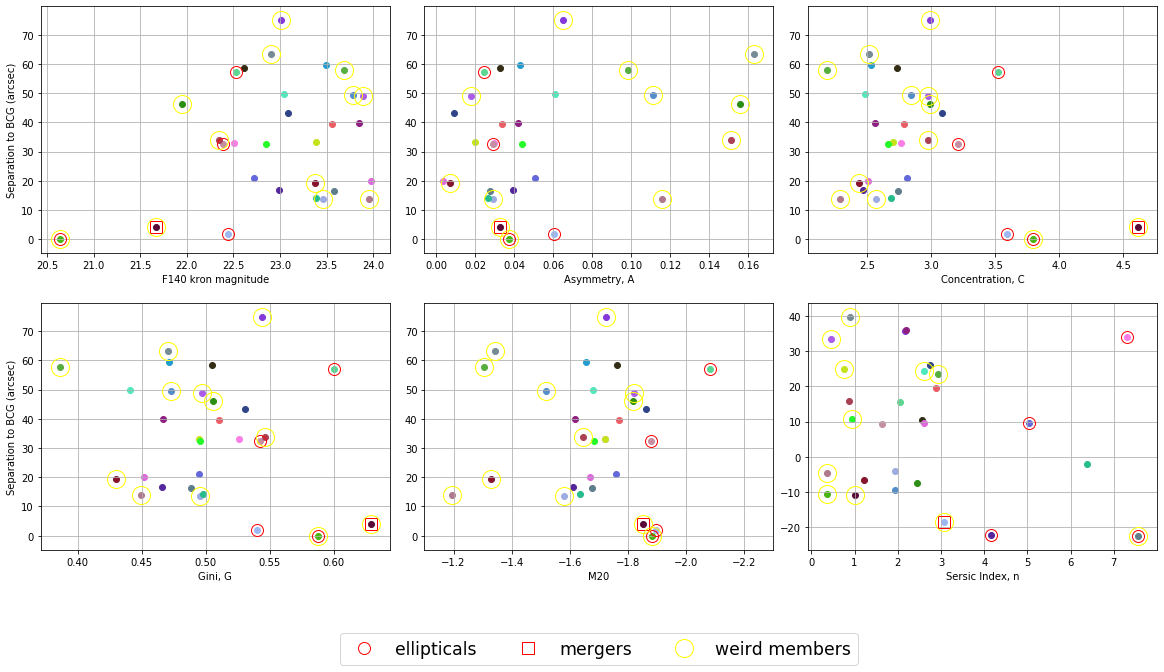

In [78]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)

###

axs[0,0].plot(members_ellip['kron(f140)'], (members_ellip['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_merger['kron(f140)'], (members_merger['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(weird_members['kron(f140)'], (weird_members['sep_BCG']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['sep_BCG'][i]), color = colour[i])

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('Separation to BCG (arcsec)')
axs[0,0].grid(True)

###

axs[0,1].plot(np.abs(members_ellip['A']), (members_ellip['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_merger['A']), (members_merger['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[0,1].plot(np.abs(weird_members['A']), (weird_members['sep_BCG']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['sep_BCG'][i]), color = colour[i])

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[0,2].plot(members_ellip['C'], (members_ellip['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_merger['C'], (members_merger['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[0,2].plot(weird_members['C'], (weird_members['sep_BCG']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['sep_BCG'][i]), color = colour[i])

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)

###

axs[1,0].plot(members_ellip['Gini'], (members_ellip['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_merger['Gini'], (members_merger['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,0].plot(weird_members['Gini'], (weird_members['sep_BCG']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['sep_BCG'][i]), color = colour[i])

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('Separation to BCG (arcsec)')
axs[1,0].grid(True)

###

axs[1,1].plot(members_ellip['M20'], (members_ellip['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_merger['M20'], (members_merger['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,1].plot(weird_members['M20'], (weird_members['sep_BCG']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['sep_BCG'][i]), color = colour[i])

axs[1,1].set_xlabel('M20')
axs[1,1].grid(True)
axs[1,1].set_xlim(-1.1, -2.3)



axs[1,2].plot(members_ellip1['emil_n'], (members_ellip1['sep_BCG']- members_ellip1['0p8(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_merger1['emil_n'], (members_merger1['sep_BCG']- members_merger1['0p8(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,2].plot(weird_members1['emil_n'], (weird_members1['sep_BCG']- weird_members1['0p8(f140)']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['sep_BCG'][i]-compareOG_data['0p8(f140)'][i]), color = colour[i])

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)




axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.5), ncol = 3, fontsize = 'xx-large')



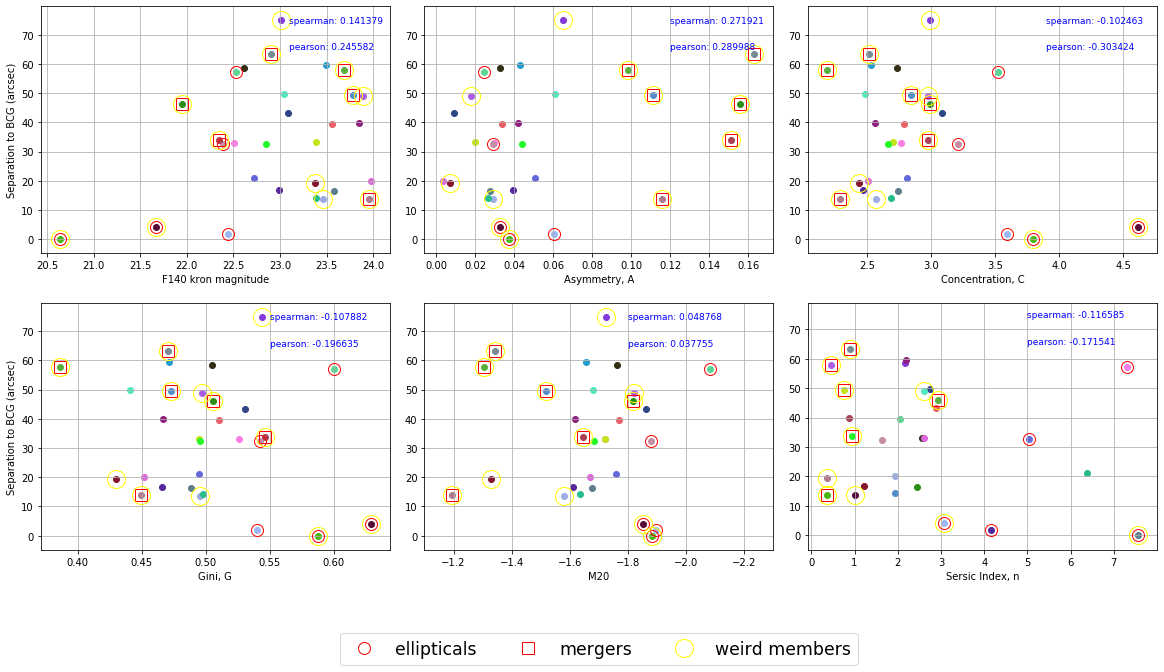

In [56]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)
###

axs[0,0].plot(members_ellipCA['kron(f140)'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['kron(f140)'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(weird_members['kron(f140)'], (weird_members['sep_BCG']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['sep_BCG'][i]), color = colour[i])

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('Separation to BCG (arcsec)')
axs[0,0].grid(True)

axs[0,0].text(23.1, 74, 'spearman: %f' %(stats.spearmanr(OGMembers_data['kron(f140)'], OGMembers_data['sep_BCG'])[0]), color='blue', size = 9)
axs[0,0].text(23.1, 65, 'pearson: %f' %(stats.pearsonr(OGMembers_data['kron(f140)'], OGMembers_data['sep_BCG'])[0]), color='blue', size = 9)


###

axs[0,1].plot(np.abs(members_ellipCA['A']), (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_mergerCA['A']), (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[0,1].plot(np.abs(weird_members['A']), (weird_members['sep_BCG']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['sep_BCG'][i]), color = colour[i])

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)

axs[0,1].text(0.12, 74, 'spearman: %f' %(stats.spearmanr(np.abs(OGMembers_data['A']), OGMembers_data['sep_BCG'])[0]), color='blue', size = 9)
axs[0,1].text(0.12, 65, 'pearson: %f' %(stats.pearsonr(np.abs(OGMembers_data['A']), OGMembers_data['sep_BCG'])[0]), color='blue', size = 9)



###

axs[0,2].plot(members_ellipCA['C'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_mergerCA['C'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[0,2].plot(weird_members['C'], (weird_members['sep_BCG']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['sep_BCG'][i]), color = colour[i])

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)

axs[0,2].text(3.9, 74, 'spearman: %f' %(stats.spearmanr(OGMembers_data['C'], OGMembers_data['sep_BCG'])[0]), color='blue', size = 9)
axs[0,2].text(3.9, 65, 'pearson: %f' %(stats.pearsonr(OGMembers_data['C'], OGMembers_data['sep_BCG'])[0]), color='blue', size = 9)



###

axs[1,0].plot(members_ellipCA['Gini'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['Gini'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,0].plot(weird_members['Gini'], (weird_members['sep_BCG']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['sep_BCG'][i]), color = colour[i])

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('Separation to BCG (arcsec)')
axs[1,0].grid(True)

axs[1,0].text(0.55, 74, 'spearman: %f' %(stats.spearmanr(OGMembers_data['Gini'], OGMembers_data['sep_BCG'])[0]), color='blue', size = 9)
axs[1,0].text(0.55, 65, 'pearson: %f' %(stats.pearsonr(OGMembers_data['Gini'], OGMembers_data['sep_BCG'])[0]), color='blue', size = 9)



###

axs[1,1].plot(members_ellipCA['M20'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['M20'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,1].plot(weird_members['M20'], (weird_members['sep_BCG']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['sep_BCG'][i]), color = colour[i])

axs[1,1].set_xlabel('M20')
axs[1,1].grid(True)
axs[1,1].set_xlim(-1.1, -2.3)

axs[1,1].text(-1.8, 74, 'spearman: %f' %(stats.spearmanr(OGMembers_data['M20'], OGMembers_data['sep_BCG'])[0]), color='blue', size = 9)
axs[1,1].text(-1.8, 65, 'pearson: %f' %(stats.pearsonr(OGMembers_data['M20'], OGMembers_data['sep_BCG'])[0]), color='blue', size = 9)


###

axs[1,2].plot(members_ellipCA1['emil_n'], (members_ellipCA1['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_mergerCA1['emil_n'], (members_mergerCA1['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,2].plot(weird_members1['emil_n'], (weird_members1['sep_BCG']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['sep_BCG'][i]), color = colour[i])

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)
axs[1,2].set_ylim(-5,79)


axs[1,2].text(5, 74, 'spearman: %f' %(stats.spearmanr(compareOG_data['emil_n'], compareOG_data['sep_BCG'])[0]), color='blue', size = 9)
axs[1,2].text(5, 65, 'pearson: %f' %(stats.pearsonr(compareOG_data['emil_n'], compareOG_data['sep_BCG'])[0]), color='blue', size = 9)

axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.5), ncol = 3, fontsize = 'xx-large')


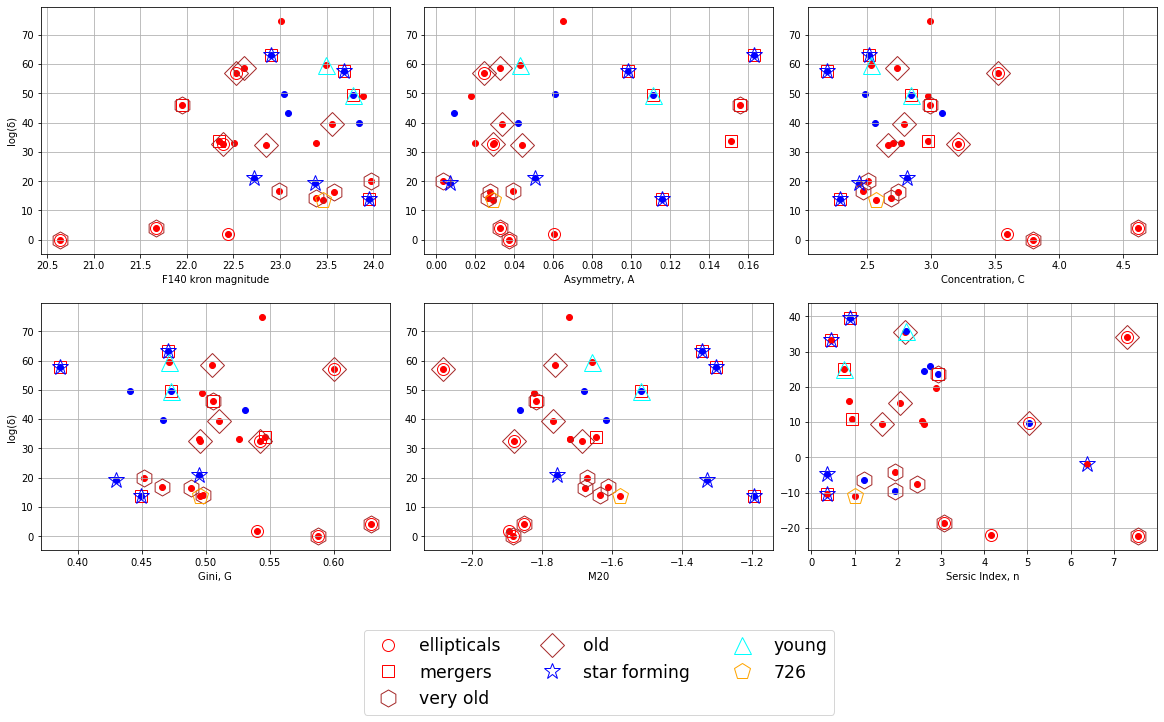

In [79]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)

###

axs[0,0].plot(members_ellipCA['kron(f140)'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['kron(f140)'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(very_old['kron(f140)'], (very_old['sep_BCG']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,0].plot(old['kron(f140)'], (old['sep_BCG']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,0].plot(star_forming['kron(f140)'], (star_forming['sep_BCG']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,0].plot(young['kron(f140)'], (young['sep_BCG']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,0].plot(dusty_726['kron(f140)'], (dusty_726['sep_BCG']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['sep_BCG'][i]), color = (OGMembers_data['colour'][i]))

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('log(\u03B4)')
axs[0,0].grid(True)

###

axs[0,1].plot(np.abs(members_ellipCA['A']), (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_mergerCA['A']), (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,1].plot(np.abs(very_old['A']), (very_old['sep_BCG']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,1].plot(np.abs(old['A']), (old['sep_BCG']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,1].plot(np.abs(star_forming['A']), (star_forming['sep_BCG']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,1].plot(np.abs(young['A']), (young['sep_BCG']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,1].plot(np.abs(dusty_726['A']), (dusty_726['sep_BCG']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')



for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['sep_BCG'][i]), color = (OGMembers_data['colour'][i]))

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[0,2].plot(members_ellipCA['C'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_mergerCA['C'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,2].plot(very_old['C'], (very_old['sep_BCG']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,2].plot(old['C'], (old['sep_BCG']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,2].plot(star_forming['C'], (star_forming['sep_BCG']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,2].plot(young['C'], (young['sep_BCG']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,2].plot(dusty_726['C'], (dusty_726['sep_BCG']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['sep_BCG'][i]), color = (OGMembers_data['colour'][i]))

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)

###

axs[1,0].plot(members_ellipCA['Gini'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['Gini'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,0].plot(very_old['Gini'], (very_old['sep_BCG']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,0].plot(old['Gini'], (old['sep_BCG']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,0].plot(star_forming['Gini'], (star_forming['sep_BCG']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,0].plot(young['Gini'], (young['sep_BCG']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,0].plot(dusty_726['Gini'], (dusty_726['sep_BCG']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['sep_BCG'][i]), color = (OGMembers_data['colour'][i]))

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('log(\u03B4)')
axs[1,0].grid(True)

###

axs[1,1].plot(members_ellipCA['M20'], (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['M20'], (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,1].plot(very_old['M20'], (very_old['sep_BCG']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,1].plot(old['M20'], (old['sep_BCG']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,1].plot(star_forming['M20'], (star_forming['sep_BCG']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,1].plot(young['M20'], (young['sep_BCG']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,1].plot(dusty_726['M20'], (dusty_726['sep_BCG']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['sep_BCG'][i]), color = (OGMembers_data['colour'][i]))

axs[1,1].set_xlabel('M20')
axs[1,1].grid(True)


axs[1,2].plot(members_ellipCA1['emil_n'], (members_ellipCA1['sep_BCG']- members_ellipCA1['0p8(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_mergerCA1['emil_n'], (members_mergerCA1['sep_BCG']- members_mergerCA1['0p8(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,2].plot(very_old1['emil_n'], (very_old1['sep_BCG']-very_old1['0p8(f140)']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,2].plot(old1['emil_n'], (old1['sep_BCG']-old1['0p8(f140)']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,2].plot(star_forming1['emil_n'], (star_forming1['sep_BCG']-star_forming1['0p8(f140)']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,2].plot(young1['emil_n'], (young1['sep_BCG']-young1['0p8(f140)']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,2].plot(dusty1_726['emil_n'], (dusty1_726['sep_BCG']-dusty1_726['0p8(f140)']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['sep_BCG'][i]-compareOG_data['0p8(f140)'][i]), color = (OGMembers_data['colour'][i]))

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)




axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.7), ncol = 3, fontsize = 'xx-large')


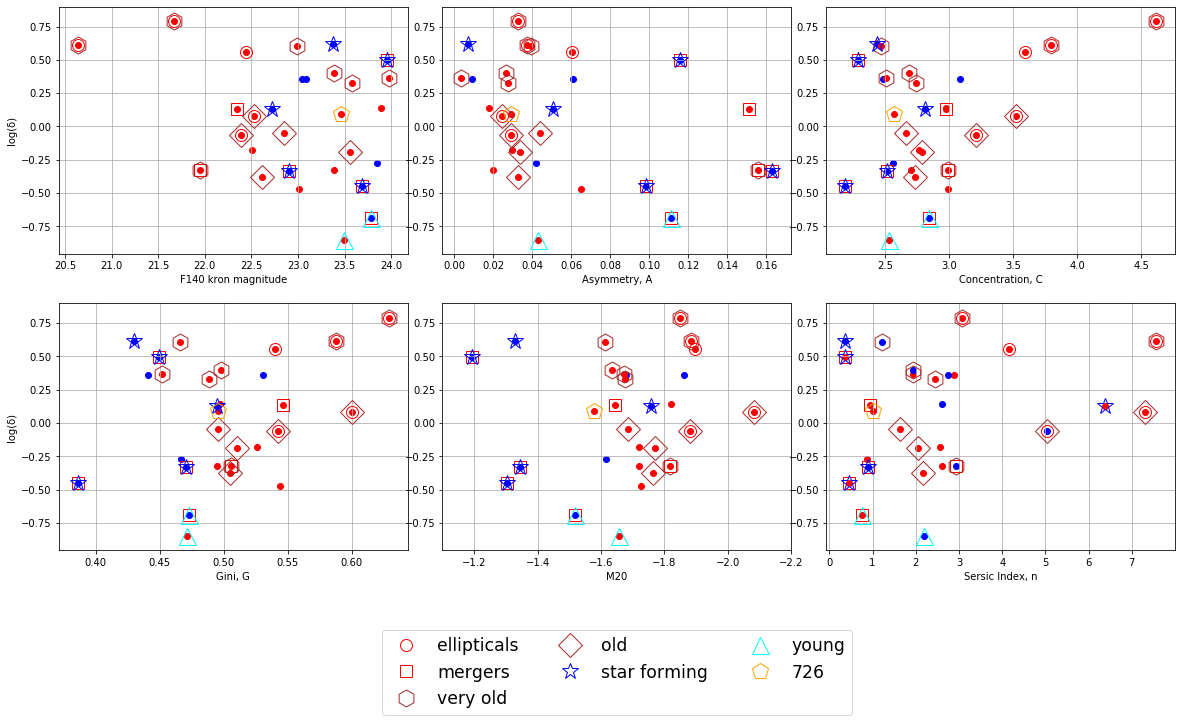

In [57]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)

###

axs[0,0].plot(members_ellipCA['kron(f140)'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['kron(f140)'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(very_old['kron(f140)'], (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,0].plot(old['kron(f140)'], (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,0].plot(star_forming['kron(f140)'], (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,0].plot(young['kron(f140)'], (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,0].plot(dusty_726['kron(f140)'], (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['log_delta'][i]), color = (OGMembers_data['colour'][i]))

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('log(\u03B4)')
axs[0,0].grid(True)

###

axs[0,1].plot(np.abs(members_ellipCA['A']), (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_mergerCA['A']), (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,1].plot(np.abs(very_old['A']), (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,1].plot(np.abs(old['A']), (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,1].plot(np.abs(star_forming['A']), (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,1].plot(np.abs(young['A']), (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,1].plot(np.abs(dusty_726['A']), (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')



for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['log_delta'][i]), color = (OGMembers_data['colour'][i]))

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[0,2].plot(members_ellipCA['C'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_mergerCA['C'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,2].plot(very_old['C'], (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,2].plot(old['C'], (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,2].plot(star_forming['C'], (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,2].plot(young['C'], (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,2].plot(dusty_726['C'], (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['log_delta'][i]), color = (OGMembers_data['colour'][i]))

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)

###

axs[1,0].plot(members_ellipCA['Gini'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['Gini'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,0].plot(very_old['Gini'], (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,0].plot(old['Gini'], (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,0].plot(star_forming['Gini'], (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,0].plot(young['Gini'], (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,0].plot(dusty_726['Gini'], (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['log_delta'][i]), color = (OGMembers_data['colour'][i]))

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('log(\u03B4)')
axs[1,0].grid(True)

###

axs[1,1].plot(members_ellipCA['M20'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['M20'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,1].plot(very_old['M20'], (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,1].plot(old['M20'], (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,1].plot(star_forming['M20'], (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,1].plot(young['M20'], (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,1].plot(dusty_726['M20'], (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['log_delta'][i]), color = (OGMembers_data['colour'][i]))

axs[1,1].set_xlabel('M20')
axs[1,1].set_xlim(-1.1, -2.2)
axs[1,1].grid(True)


axs[1,2].plot(members_ellipCA1['emil_n'], (members_ellipCA1['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_mergerCA1['emil_n'], (members_mergerCA1['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,2].plot(very_old1['emil_n'], (very_old1['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,2].plot(old1['emil_n'], (old1['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,2].plot(star_forming1['emil_n'], (star_forming1['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,2].plot(young1['emil_n'], (young1['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,2].plot(dusty1_726['emil_n'], (dusty1_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['log_delta'][i]), color = (OGMembers_data['colour'][i]))

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)




axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.7), ncol = 3, fontsize = 'xx-large')


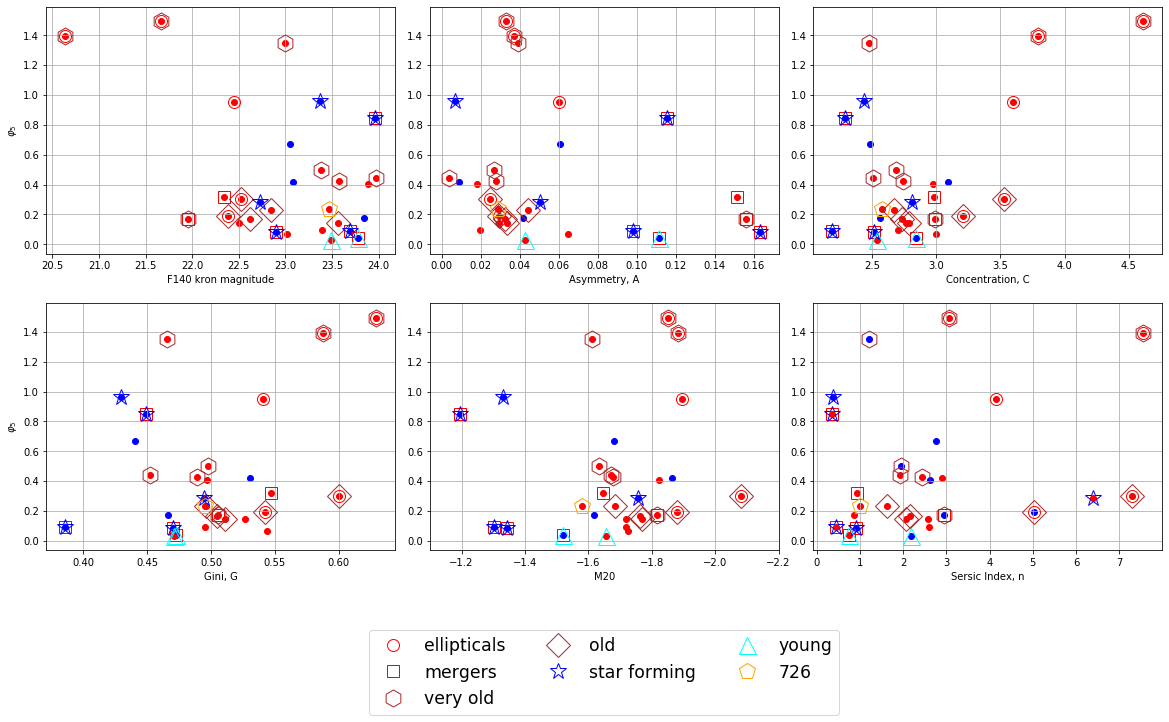

In [80]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)

###

axs[0,0].plot(members_ellipCA['kron(f140)'], (members_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['kron(f140)'], (members_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(very_old['kron(f140)'], (very_old['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,0].plot(old['kron(f140)'], (old['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,0].plot(star_forming['kron(f140)'], (star_forming['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,0].plot(young['kron(f140)'], (young['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,0].plot(dusty_726['kron(f140)'], (dusty_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('$\u03C6_{5}$')
axs[0,0].grid(True)

###

axs[0,1].plot(np.abs(members_ellipCA['A']), (members_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_mergerCA['A']), (members_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,1].plot(np.abs(very_old['A']), (very_old['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,1].plot(np.abs(old['A']), (old['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,1].plot(np.abs(star_forming['A']), (star_forming['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,1].plot(np.abs(young['A']), (young['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,1].plot(np.abs(dusty_726['A']), (dusty_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')



for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[0,2].plot(members_ellipCA['C'], (members_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_mergerCA['C'], (members_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,2].plot(very_old['C'], (very_old['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,2].plot(old['C'], (old['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,2].plot(star_forming['C'], (star_forming['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,2].plot(young['C'], (young['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,2].plot(dusty_726['C'], (dusty_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)

###

axs[1,0].plot(members_ellipCA['Gini'], (members_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['Gini'], (members_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,0].plot(very_old['Gini'], (very_old['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,0].plot(old['Gini'], (old['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,0].plot(star_forming['Gini'], (star_forming['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,0].plot(young['Gini'], (young['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,0].plot(dusty_726['Gini'], (dusty_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('$\u03C6_{5}$')
axs[1,0].grid(True)

###

axs[1,1].plot(members_ellipCA['M20'], (members_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['M20'], (members_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,1].plot(very_old['M20'], (very_old['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,1].plot(old['M20'], (old['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,1].plot(star_forming['M20'], (star_forming['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,1].plot(young['M20'], (young['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,1].plot(dusty_726['M20'], (dusty_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[1,1].set_xlabel('M20')
axs[1,1].set_xlim(-1.1, -2.2)
axs[1,1].grid(True)


axs[1,2].plot(members_ellipCA1['emil_n'], (members_ellipCA1['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_mergerCA1['emil_n'], (members_mergerCA1['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,2].plot(very_old1['emil_n'], (very_old1['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,2].plot(old1['emil_n'], (old1['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,2].plot(star_forming1['emil_n'], (star_forming1['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,2].plot(young1['emil_n'], (young1['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,2].plot(dusty1_726['emil_n'], (dusty1_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)




axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.7), ncol = 3, fontsize = 'xx-large')


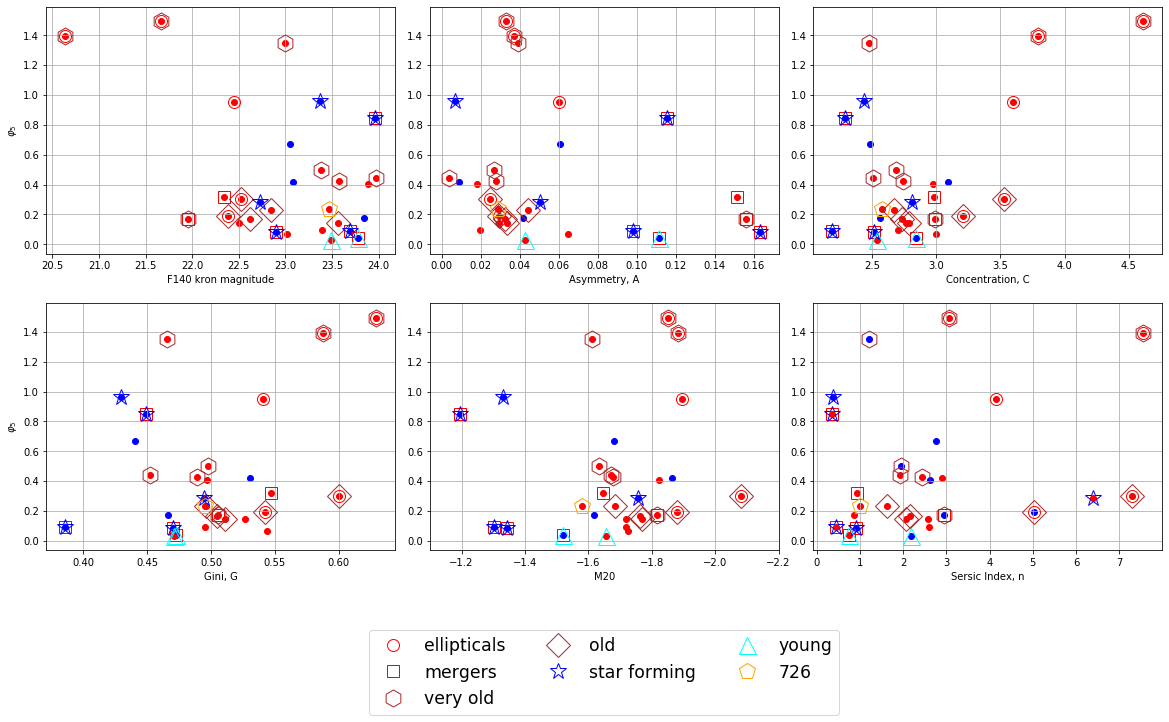

In [82]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)



###

axs[0,0].plot(members_ellipCA['kron(f140)'], (members_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['kron(f140)'], (members_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(very_old['kron(f140)'], (very_old['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,0].plot(old['kron(f140)'], (old['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,0].plot(star_forming['kron(f140)'], (star_forming['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,0].plot(young['kron(f140)'], (young['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,0].plot(dusty_726['kron(f140)'], (dusty_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('$\u03C6_{5}$')
axs[0,0].grid(True)

###

axs[0,1].plot(np.abs(members_ellipCA['A']), (members_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_mergerCA['A']), (members_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,1].plot(np.abs(very_old['A']), (very_old['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,1].plot(np.abs(old['A']), (old['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,1].plot(np.abs(star_forming['A']), (star_forming['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,1].plot(np.abs(young['A']), (young['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,1].plot(np.abs(dusty_726['A']), (dusty_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')



for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[0,2].plot(members_ellipCA['C'], (members_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_mergerCA['C'], (members_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,2].plot(very_old['C'], (very_old['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,2].plot(old['C'], (old['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,2].plot(star_forming['C'], (star_forming['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,2].plot(young['C'], (young['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,2].plot(dusty_726['C'], (dusty_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)

###

axs[1,0].plot(members_ellipCA['Gini'], (members_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['Gini'], (members_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,0].plot(very_old['Gini'], (very_old['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,0].plot(old['Gini'], (old['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,0].plot(star_forming['Gini'], (star_forming['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,0].plot(young['Gini'], (young['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,0].plot(dusty_726['Gini'], (dusty_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('$\u03C6_{5}$')
axs[1,0].grid(True)

###

axs[1,1].plot(members_ellipCA['M20'], (members_ellipCA['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['M20'], (members_mergerCA['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,1].plot(very_old['M20'], (very_old['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,1].plot(old['M20'], (old['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,1].plot(star_forming['M20'], (star_forming['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,1].plot(young['M20'], (young['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,1].plot(dusty_726['M20'], (dusty_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[1,1].set_xlabel('M20')
axs[1,1].set_xlim(-1.1, -2.2)
axs[1,1].grid(True)


axs[1,2].plot(members_ellipCA1['emil_n'], (members_ellipCA1['phi']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_mergerCA1['emil_n'], (members_mergerCA1['phi']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,2].plot(very_old1['emil_n'], (very_old1['phi']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,2].plot(old1['emil_n'], (old1['phi']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,2].plot(star_forming1['emil_n'], (star_forming1['phi']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,2].plot(young1['emil_n'], (young1['phi']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,2].plot(dusty1_726['emil_n'], (dusty1_726['phi']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['phi'][i]), color = (OGMembers_data['colour'][i]))

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)




axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.7), ncol = 3, fontsize = 'xx-large')


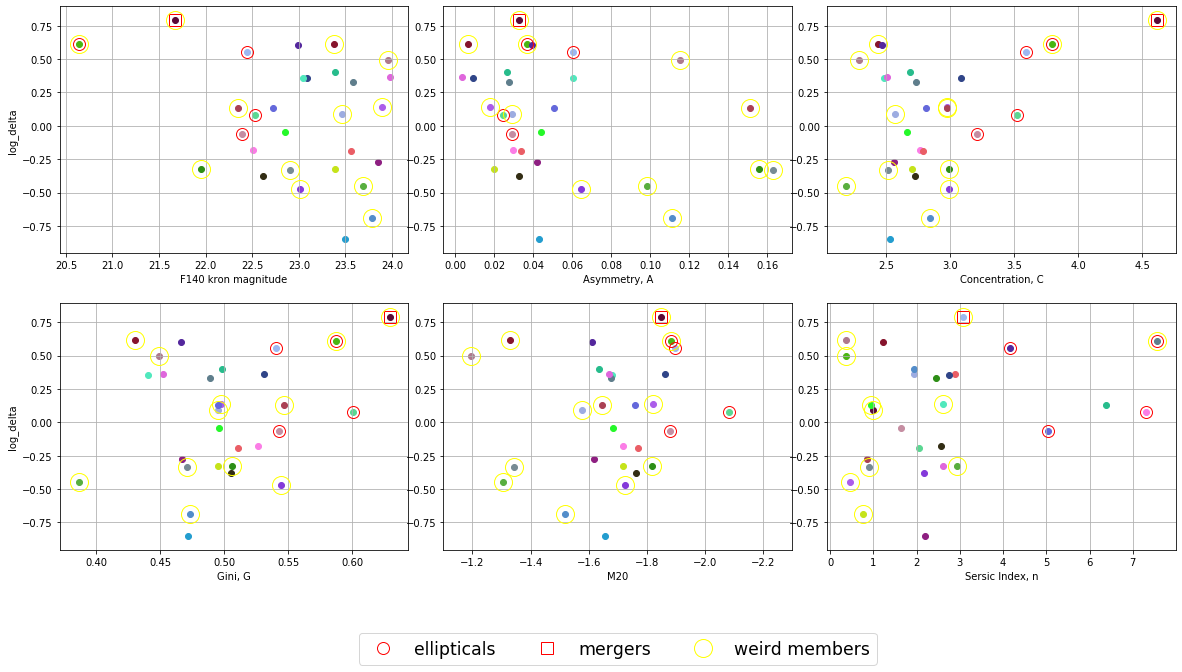

In [59]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)

###

axs[0,0].plot(members_ellip['kron(f140)'], (members_ellip['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_merger['kron(f140)'], (members_merger['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(weird_members['kron(f140)'], (weird_members['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('log_delta')
axs[0,0].grid(True)

###

axs[0,1].plot(np.abs(members_ellip['A']), (members_ellip['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_merger['A']), (members_merger['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[0,1].plot(np.abs(weird_members['A']), (weird_members['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['log_delta'][i]), color = colour[i])

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[0,2].plot(members_ellip['C'], (members_ellip['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_merger['C'], (members_merger['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[0,2].plot(weird_members['C'], (weird_members['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)

###

axs[1,0].plot(members_ellip['Gini'], (members_ellip['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_merger['Gini'], (members_merger['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,0].plot(weird_members['Gini'], (weird_members['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('log_delta')
axs[1,0].grid(True)

###

axs[1,1].plot(members_ellip['M20'], (members_ellip['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_merger['M20'], (members_merger['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,1].plot(weird_members['M20'], (weird_members['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[1,1].set_xlabel('M20')
axs[1,1].grid(True)
axs[1,1].set_xlim(-1.1, -2.3)



axs[1,2].plot(members_ellip1['emil_n'], (members_ellip1['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_merger1['emil_n'], (members_merger1['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,2].plot(weird_members1['emil_n'], (weird_members1['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['log_delta'][i]), color = colour[i])

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)




axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.5), ncol = 3, fontsize = 'xx-large')


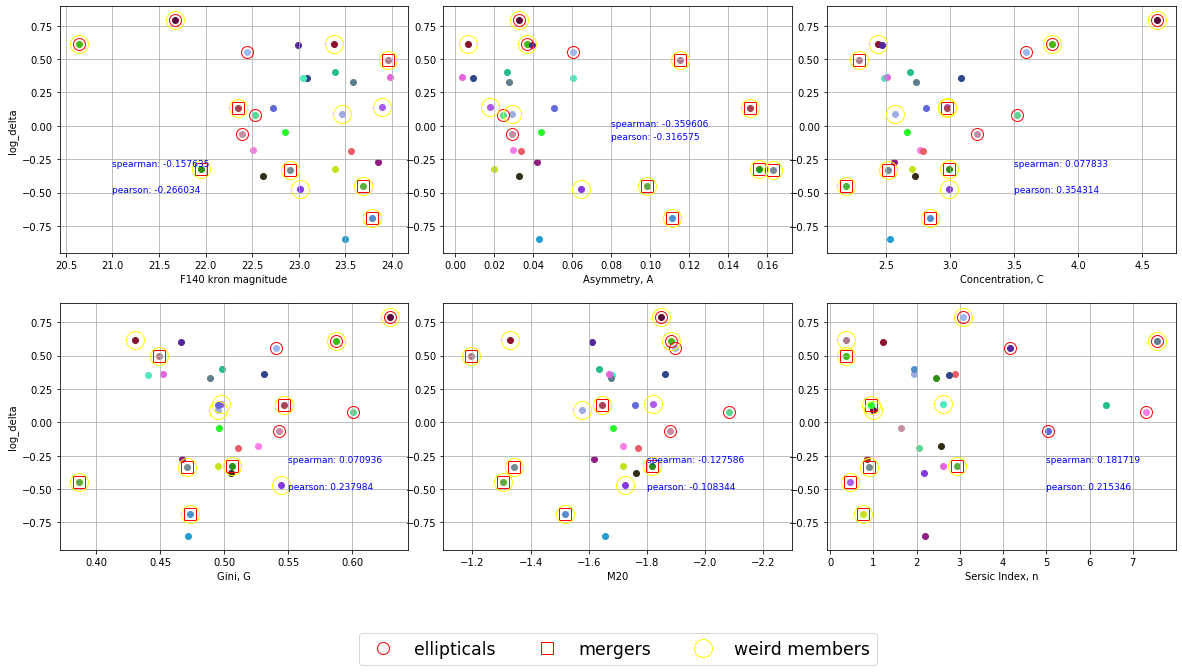

In [60]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)
###

axs[0,0].plot(members_ellipCA['kron(f140)'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['kron(f140)'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(weird_members['kron(f140)'], (weird_members['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('log_delta')
axs[0,0].grid(True)

axs[0,0].text(21,-0.3, 'spearman: %f' %(stats.spearmanr(OGMembers_data['kron(f140)'], OGMembers_data['log_delta'])[0]), color='blue', size = 9)
axs[0,0].text(21,-0.5, 'pearson: %f' %(stats.pearsonr(OGMembers_data['kron(f140)'], OGMembers_data['log_delta'])[0]), color='blue', size = 9)


###

axs[0,1].plot(np.abs(members_ellipCA['A']), (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_mergerCA['A']), (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[0,1].plot(np.abs(weird_members['A']), (weird_members['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['log_delta'][i]), color = colour[i])

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)

axs[0,1].text(0.08,0, 'spearman: %f' %(stats.spearmanr(np.abs(OGMembers_data['A']), OGMembers_data['log_delta'])[0]), color='blue', size = 9)
axs[0,1].text(0.08,-0.1, 'pearson: %f' %(stats.pearsonr(np.abs(OGMembers_data['A']), OGMembers_data['log_delta'])[0]), color='blue', size = 9)


###

axs[0,2].plot(members_ellipCA['C'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_mergerCA['C'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[0,2].plot(weird_members['C'], (weird_members['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)

axs[0,2].text(3.5,-0.3, 'spearman: %f' %(stats.spearmanr(OGMembers_data['C'], OGMembers_data['log_delta'])[0]), color='blue', size = 9)
axs[0,2].text(3.5,-0.5, 'pearson: %f' %(stats.pearsonr(OGMembers_data['C'], OGMembers_data['log_delta'])[0]), color='blue', size = 9)


###

axs[1,0].plot(members_ellipCA['Gini'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['Gini'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,0].plot(weird_members['Gini'], (weird_members['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('log_delta')
axs[1,0].grid(True)

axs[1,0].text(0.55,-0.3, 'spearman: %f' %(stats.spearmanr(OGMembers_data['Gini'], OGMembers_data['log_delta'])[0]), color='blue', size = 9)
axs[1,0].text(0.55,-0.5, 'pearson: %f' %(stats.pearsonr(OGMembers_data['Gini'], OGMembers_data['log_delta'])[0]), color='blue', size = 9)


###

axs[1,1].plot(members_ellipCA['M20'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['M20'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,1].plot(weird_members['M20'], (weird_members['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[1,1].set_xlabel('M20')
axs[1,1].grid(True)
axs[1,1].set_xlim(-1.1, -2.3)

axs[1,1].text(-1.8,-0.3, 'spearman: %f' %(stats.spearmanr(OGMembers_data['M20'], OGMembers_data['log_delta'])[0]), color='blue', size = 9)
axs[1,1].text(-1.8,-0.5, 'pearson: %f' %(stats.pearsonr(OGMembers_data['M20'], OGMembers_data['log_delta'])[0]), color='blue', size = 9)

#
axs[1,2].plot(members_ellipCA1['emil_n'], (members_ellipCA1['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_mergerCA1['emil_n'], (members_mergerCA1['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,2].plot(weird_members1['emil_n'], (weird_members1['log_delta']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['log_delta'][i]), color = colour[i])

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)

axs[1,2].text(5,-0.3, 'spearman: %f' %(stats.spearmanr(compareOG_data['emil_n'], compareOG_data['log_delta'])[0]), color='blue', size = 9)
axs[1,2].text(5,-0.5, 'pearson: %f' %(stats.pearsonr(compareOG_data['emil_n'], compareOG_data['log_delta'])[0]), color='blue', size = 9)

axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.5), ncol = 3, fontsize = 'xx-large')

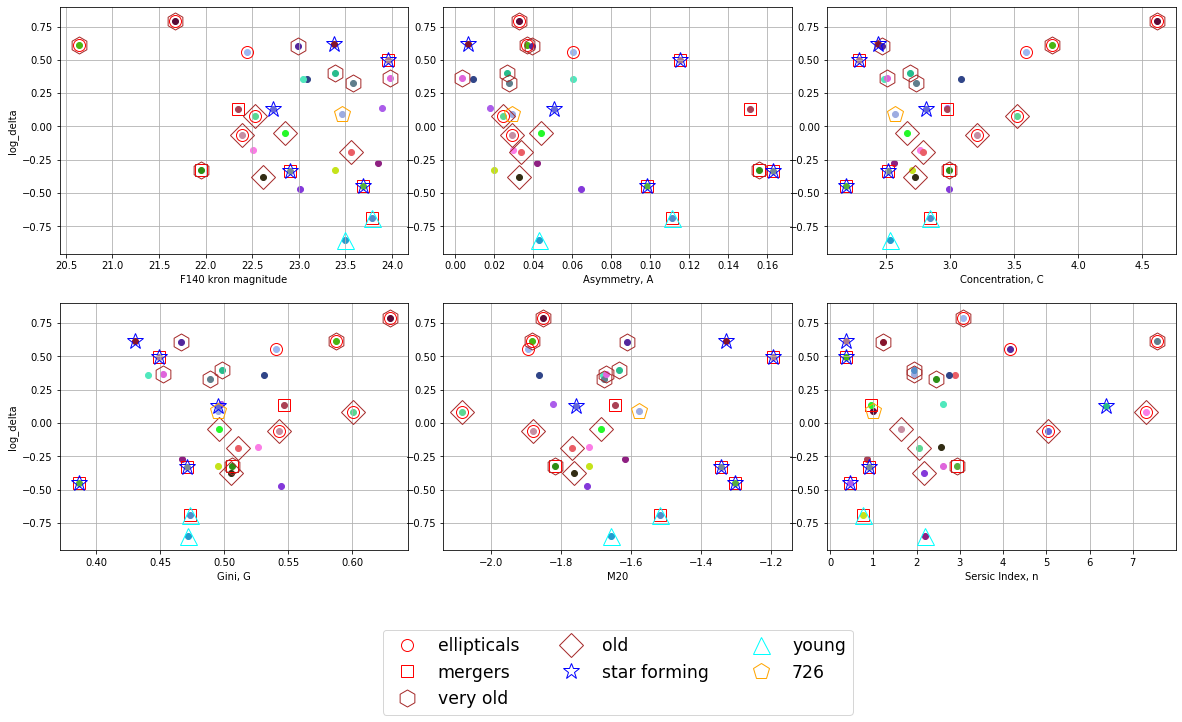

In [61]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)

###

axs[0,0].plot(members_ellipCA['kron(f140)'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['kron(f140)'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(very_old['kron(f140)'], (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,0].plot(old['kron(f140)'], (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,0].plot(star_forming['kron(f140)'], (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,0].plot(young['kron(f140)'], (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,0].plot(dusty_726['kron(f140)'], (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('log_delta')
axs[0,0].grid(True)

###

axs[0,1].plot(np.abs(members_ellipCA['A']), (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_mergerCA['A']), (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,1].plot(np.abs(very_old['A']), (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,1].plot(np.abs(old['A']), (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,1].plot(np.abs(star_forming['A']), (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,1].plot(np.abs(young['A']), (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,1].plot(np.abs(dusty_726['A']), (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')



for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['log_delta'][i]), color = colour[i])

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[0,2].plot(members_ellipCA['C'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_mergerCA['C'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,2].plot(very_old['C'], (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,2].plot(old['C'], (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,2].plot(star_forming['C'], (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,2].plot(young['C'], (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,2].plot(dusty_726['C'], (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)

###

axs[1,0].plot(members_ellipCA['Gini'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['Gini'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,0].plot(very_old['Gini'], (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,0].plot(old['Gini'], (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,0].plot(star_forming['Gini'], (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,0].plot(young['Gini'], (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,0].plot(dusty_726['Gini'], (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('log_delta')
axs[1,0].grid(True)

###

axs[1,1].plot(members_ellipCA['M20'], (members_ellipCA['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['M20'], (members_mergerCA['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,1].plot(very_old['M20'], (very_old['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,1].plot(old['M20'], (old['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,1].plot(star_forming['M20'], (star_forming['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,1].plot(young['M20'], (young['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,1].plot(dusty_726['M20'], (dusty_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['log_delta'][i]), color = colour[i])

axs[1,1].set_xlabel('M20')
axs[1,1].grid(True)


axs[1,2].plot(members_ellipCA1['emil_n'], (members_ellipCA1['log_delta']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_mergerCA1['emil_n'], (members_mergerCA1['log_delta']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,2].plot(very_old1['emil_n'], (very_old1['log_delta']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,2].plot(old1['emil_n'], (old1['log_delta']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,2].plot(star_forming1['emil_n'], (star_forming1['log_delta']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,2].plot(young1['emil_n'], (young1['log_delta']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,2].plot(dusty1_726['emil_n'], (dusty1_726['log_delta']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['log_delta'][i]), color = colour[i])

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)






axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.7), ncol = 3, fontsize = 'xx-large')


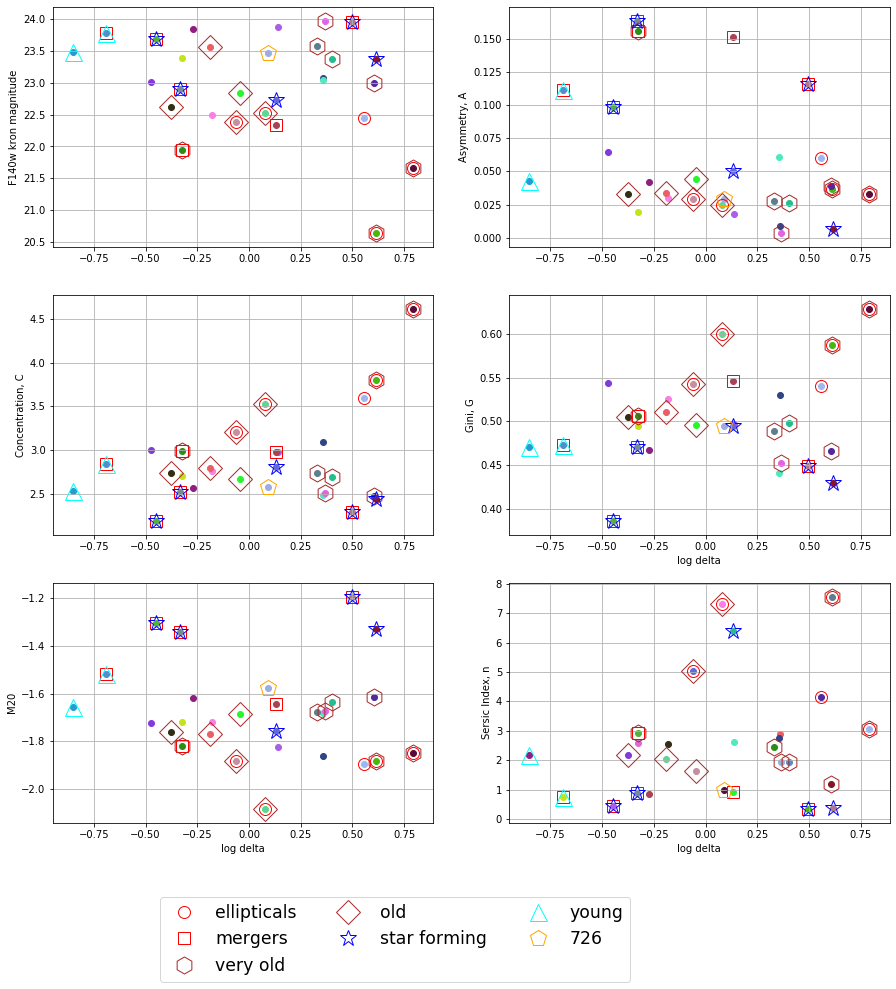

In [62]:
fig, axs = plt.subplots(3,2, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.2)

###

axs[0,0].plot(members_ellipCA['log_delta'], (members_ellipCA['kron(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['log_delta'], (members_mergerCA['kron(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(very_old['log_delta'], (very_old['kron(f140)']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,0].plot(old['log_delta'], (old['kron(f140)']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,0].plot(star_forming['log_delta'], (star_forming['kron(f140)']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,0].plot(young['log_delta'], (young['kron(f140)']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,0].plot(dusty_726['log_delta'], (dusty_726['kron(f140)']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['log_delta'][i], (OGMembers_data['kron(f140)'][i]), color = colour[i])

axs[0,0].set_ylabel('F140w kron magnitude')
axs[0,0].grid(True)

###

axs[0,1].plot((members_ellipCA['log_delta']), np.abs(members_ellipCA['A']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot((members_mergerCA['log_delta']), np.abs(members_mergerCA['A']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,1].plot((very_old['log_delta']), np.abs(very_old['A']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,1].plot((old['log_delta']), np.abs(old['A']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,1].plot((star_forming['log_delta']), np.abs(star_forming['A']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,1].plot((young['log_delta']), np.abs(young['A']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,1].plot((dusty_726['log_delta']), np.abs(dusty_726['A']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')



for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter((OGMembers_data['log_delta'][i]), np.abs(OGMembers_data['A'][i]), color = colour[i])

axs[0,1].set_ylabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[1,0].plot(members_ellipCA['log_delta'], (members_ellipCA['C']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['log_delta'], (members_mergerCA['C']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,0].plot(very_old['log_delta'], (very_old['C']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,0].plot(old['log_delta'], (old['C']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,0].plot(star_forming['log_delta'], (star_forming['C']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,0].plot(young['log_delta'], (young['C']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,0].plot(dusty_726['log_delta'], (dusty_726['C']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['log_delta'][i], (OGMembers_data['C'][i]), color = colour[i])

axs[1,0].set_ylabel('Concentration, C')

axs[1,0].grid(True)

###

axs[1,1].plot(members_ellipCA['log_delta'], (members_ellipCA['Gini']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['log_delta'], (members_mergerCA['Gini']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,1].plot(very_old['log_delta'], (very_old['Gini']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,1].plot(old['log_delta'], (old['Gini']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,1].plot(star_forming['log_delta'], (star_forming['Gini']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,1].plot(young['log_delta'], (young['Gini']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,1].plot(dusty_726['log_delta'], (dusty_726['Gini']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['log_delta'][i], (OGMembers_data['Gini'][i]), color = colour[i])

#axs[1,0].set_xlabel('Gini, G')
axs[1,1].set_ylabel('Gini, G')
axs[1,1].grid(True)
axs[1,1].set_xlabel('log delta')


###

axs[2,0].plot(members_ellipCA['log_delta'], (members_ellipCA['M20']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[2,0].plot(members_mergerCA['log_delta'], (members_mergerCA['M20']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[2,0].plot(very_old['log_delta'], (very_old['M20']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[2,0].plot(old['log_delta'], (old['M20']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[2,0].plot(star_forming['log_delta'], (star_forming['M20']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[2,0].plot(young['log_delta'], (young['M20']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[2,0].plot(dusty_726['log_delta'], (dusty_726['M20']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[2,0].scatter(OGMembers_data['log_delta'][i], (OGMembers_data['M20'][i]), color = colour[i])

axs[2,0].set_ylabel('M20')
axs[2,0].grid(True)
axs[2,0].set_xlabel('log delta')


###

axs[2,1].plot(members_ellipCA1['log_delta'], (members_ellipCA1['emil_n']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[2,1].plot(members_mergerCA1['log_delta'], (members_mergerCA1['emil_n']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[2,1].plot(very_old1['log_delta'], (very_old1['emil_n']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[2,1].plot(old1['log_delta'], (old1['emil_n']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[2,1].plot(star_forming1['log_delta'], (star_forming1['emil_n']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[2,1].plot(young1['log_delta'], (young1['emil_n']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[2,1].plot(dusty1_726['log_delta'], (dusty1_726['emil_n']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(compareOG_data)):
    
    axs[2,1].scatter(compareOG_data['log_delta'][i], (compareOG_data['emil_n'][i]), color = colour[i])

axs[2,1].set_ylabel('Sersic Index, n')
axs[2,1].set_xlabel('log delta')

axs[2,1].grid(True)






axs[2,1].legend(loc='lower center',bbox_to_anchor=(-0.3, -0.7), ncol = 3, fontsize = 'xx-large')


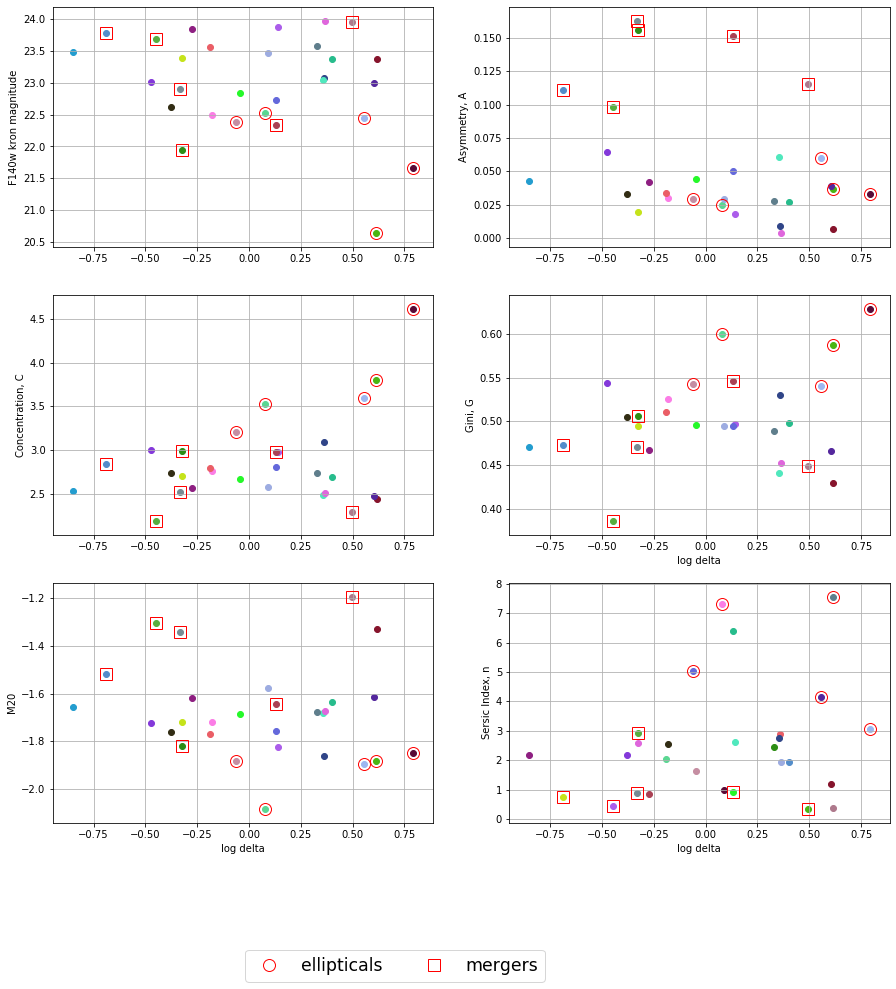

In [63]:
fig, axs = plt.subplots(3,2, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.2)

###

axs[0,0].plot(members_ellipCA['log_delta'], (members_ellipCA['kron(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['log_delta'], (members_mergerCA['kron(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['log_delta'][i], (OGMembers_data['kron(f140)'][i]), color = colour[i])

axs[0,0].set_ylabel('F140w kron magnitude')
axs[0,0].grid(True)

###

axs[0,1].plot((members_ellipCA['log_delta']), np.abs(members_ellipCA['A']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot((members_mergerCA['log_delta']), np.abs(members_mergerCA['A']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter((OGMembers_data['log_delta'][i]), np.abs(OGMembers_data['A'][i]), color = colour[i])

axs[0,1].set_ylabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[1,0].plot(members_ellipCA['log_delta'], (members_ellipCA['C']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['log_delta'], (members_mergerCA['C']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')


for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['log_delta'][i], (OGMembers_data['C'][i]), color = colour[i])

axs[1,0].set_ylabel('Concentration, C')

axs[1,0].grid(True)

###

axs[1,1].plot(members_ellipCA['log_delta'], (members_ellipCA['Gini']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['log_delta'], (members_mergerCA['Gini']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')


for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['log_delta'][i], (OGMembers_data['Gini'][i]), color = colour[i])

#axs[1,0].set_xlabel('Gini, G')
axs[1,1].set_ylabel('Gini, G')
axs[1,1].grid(True)
axs[1,1].set_xlabel('log delta')


###

axs[2,0].plot(members_ellipCA['log_delta'], (members_ellipCA['M20']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[2,0].plot(members_mergerCA['log_delta'], (members_mergerCA['M20']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')


for i in range(len(OGMembers_data)):
    
    axs[2,0].scatter(OGMembers_data['log_delta'][i], (OGMembers_data['M20'][i]), color = colour[i])

axs[2,0].set_ylabel('M20')
axs[2,0].grid(True)
axs[2,0].set_xlabel('log delta')


###

axs[2,1].plot(members_ellipCA1['log_delta'], (members_ellipCA1['emil_n']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[2,1].plot(members_mergerCA1['log_delta'], (members_mergerCA1['emil_n']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(compareOG_data)):
    
    axs[2,1].scatter(compareOG_data['log_delta'][i], (compareOG_data['emil_n'][i]), color = colour[i])

axs[2,1].set_ylabel('Sersic Index, n')
axs[2,1].set_xlabel('log delta')

axs[2,1].grid(True)






axs[2,1].legend(loc='lower center',bbox_to_anchor=(-0.3, -0.7), ncol = 3, fontsize = 'xx-large')


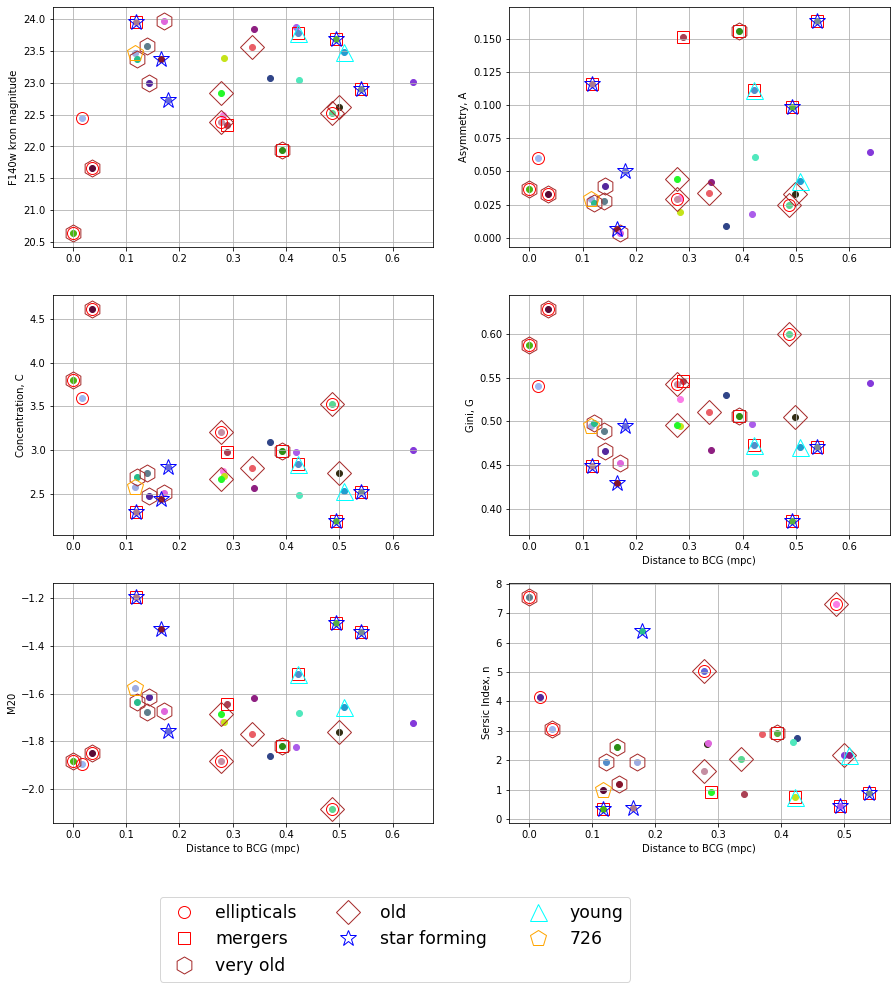

In [64]:
fig, axs = plt.subplots(3,2, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.2)

###

axs[0,0].plot(members_ellipCA['BCGsep_mpc'], (members_ellipCA['kron(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['BCGsep_mpc'], (members_mergerCA['kron(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(very_old['BCGsep_mpc'], (very_old['kron(f140)']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,0].plot(old['BCGsep_mpc'], (old['kron(f140)']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,0].plot(star_forming['BCGsep_mpc'], (star_forming['kron(f140)']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,0].plot(young['BCGsep_mpc'], (young['kron(f140)']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,0].plot(dusty_726['BCGsep_mpc'], (dusty_726['kron(f140)']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['BCGsep_mpc'][i], (OGMembers_data['kron(f140)'][i]), color = colour[i])

axs[0,0].set_ylabel('F140w kron magnitude')
axs[0,0].grid(True)

###

axs[0,1].plot((members_ellipCA['BCGsep_mpc']), np.abs(members_ellipCA['A']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot((members_mergerCA['BCGsep_mpc']), np.abs(members_mergerCA['A']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,1].plot((very_old['BCGsep_mpc']), np.abs(very_old['A']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[0,1].plot((old['BCGsep_mpc']), np.abs(old['A']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[0,1].plot((star_forming['BCGsep_mpc']), np.abs(star_forming['A']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[0,1].plot((young['BCGsep_mpc']), np.abs(young['A']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[0,1].plot((dusty_726['BCGsep_mpc']), np.abs(dusty_726['A']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')



for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter((OGMembers_data['BCGsep_mpc'][i]), np.abs(OGMembers_data['A'][i]), color = colour[i])

axs[0,1].set_ylabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[1,0].plot(members_ellipCA['BCGsep_mpc'], (members_ellipCA['C']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['BCGsep_mpc'], (members_mergerCA['C']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,0].plot(very_old['BCGsep_mpc'], (very_old['C']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,0].plot(old['BCGsep_mpc'], (old['C']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,0].plot(star_forming['BCGsep_mpc'], (star_forming['C']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,0].plot(young['BCGsep_mpc'], (young['C']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,0].plot(dusty_726['BCGsep_mpc'], (dusty_726['C']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['BCGsep_mpc'][i], (OGMembers_data['C'][i]), color = colour[i])

axs[1,0].set_ylabel('Concentration, C')

axs[1,0].grid(True)

###

axs[1,1].plot(members_ellipCA['BCGsep_mpc'], (members_ellipCA['Gini']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['BCGsep_mpc'], (members_mergerCA['Gini']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[1,1].plot(very_old['BCGsep_mpc'], (very_old['Gini']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[1,1].plot(old['BCGsep_mpc'], (old['Gini']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[1,1].plot(star_forming['BCGsep_mpc'], (star_forming['Gini']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[1,1].plot(young['BCGsep_mpc'], (young['Gini']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[1,1].plot(dusty_726['BCGsep_mpc'], (dusty_726['Gini']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['BCGsep_mpc'][i], (OGMembers_data['Gini'][i]), color = colour[i])

#axs[1,0].set_xlabel('Gini, G')
axs[1,1].set_ylabel('Gini, G')
axs[1,1].grid(True)
axs[1,1].set_xlabel('Distance to BCG (mpc)')


###

axs[2,0].plot(members_ellipCA['BCGsep_mpc'], (members_ellipCA['M20']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[2,0].plot(members_mergerCA['BCGsep_mpc'], (members_mergerCA['M20']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[2,0].plot(very_old['BCGsep_mpc'], (very_old['M20']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[2,0].plot(old['BCGsep_mpc'], (old['M20']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[2,0].plot(star_forming['BCGsep_mpc'], (star_forming['M20']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[2,0].plot(young['BCGsep_mpc'], (young['M20']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[2,0].plot(dusty_726['BCGsep_mpc'], (dusty_726['M20']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')

for i in range(len(OGMembers_data)):
    
    axs[2,0].scatter(OGMembers_data['BCGsep_mpc'][i], (OGMembers_data['M20'][i]), color = colour[i])

axs[2,0].set_ylabel('M20')
axs[2,0].grid(True)
axs[2,0].set_xlabel('Distance to BCG (mpc)')


###

axs[2,1].plot(members_ellipCA1['BCGsep_mpc'], (members_ellipCA1['emil_n']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[2,1].plot(members_mergerCA1['BCGsep_mpc'], (members_mergerCA1['emil_n']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[2,1].plot(very_old1['BCGsep_mpc'], (very_old1['emil_n']), 'h', color = 'brown', markersize=17, fillstyle='none', label='very old')
axs[2,1].plot(old1['BCGsep_mpc'], (old1['emil_n']), 'D', color = 'brown', markersize=17, fillstyle='none', label='old')
axs[2,1].plot(star_forming1['BCGsep_mpc'], (star_forming1['emil_n']), '*', color = 'blue', markersize=17, fillstyle='none', label='star forming')
axs[2,1].plot(young1['BCGsep_mpc'], (young1['emil_n']), '^', color = 'cyan', markersize=17, fillstyle='none', label='young')
axs[2,1].plot(dusty1_726['BCGsep_mpc'], (dusty1_726['emil_n']), 'p', color = 'orange', markersize=17, fillstyle='none', label='726')


for i in range(len(compareOG_data)):
    
    axs[2,1].scatter(compareOG_data['BCGsep_mpc'][i], (compareOG_data['emil_n'][i]), color = colour[i])

axs[2,1].set_ylabel('Sersic Index, n')
axs[2,1].set_xlabel('Distance to BCG (mpc)')

axs[2,1].grid(True)






axs[2,1].legend(loc='lower center',bbox_to_anchor=(-0.3, -0.7), ncol = 3, fontsize = 'xx-large')


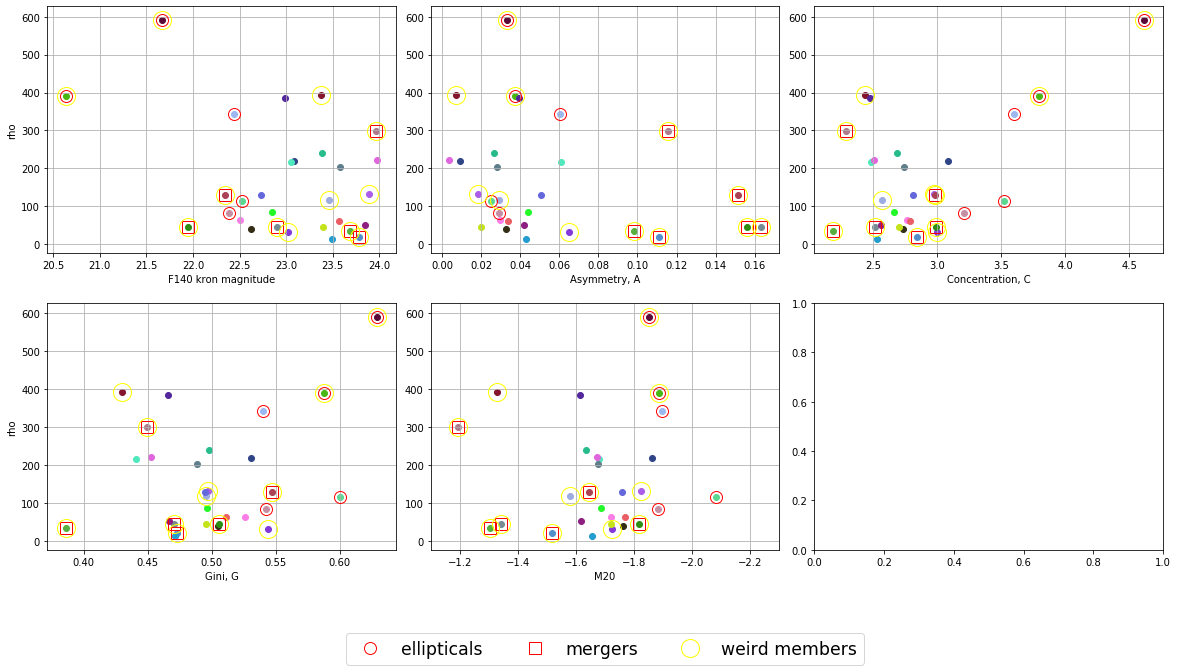

In [65]:
"""DONT RUN"""

"""With previous rho values"""

fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.1)
###

axs[0,0].plot(members_ellipCA['kron(f140)'], (members_ellipCA['rho']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,0].plot(members_mergerCA['kron(f140)'], (members_mergerCA['rho']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')

axs[0,0].plot(weird_members['kron(f140)'], (weird_members['rho']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,0].scatter(OGMembers_data['kron(f140)'][i], (OGMembers_data['rho'][i]), color = colour[i])

axs[0,0].set_xlabel('F140 kron magnitude')
axs[0,0].set_ylabel('rho')
axs[0,0].grid(True)

###

axs[0,1].plot(np.abs(members_ellipCA['A']), (members_ellipCA['rho']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,1].plot(np.abs(members_mergerCA['A']), (members_mergerCA['rho']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[0,1].plot(np.abs(weird_members['A']), (weird_members['rho']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,1].scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['rho'][i]), color = colour[i])

axs[0,1].set_xlabel('Asymmetry, A')
axs[0,1].grid(True)

###

axs[0,2].plot(members_ellipCA['C'], (members_ellipCA['rho']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[0,2].plot(members_mergerCA['C'], (members_mergerCA['rho']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[0,2].plot(weird_members['C'], (weird_members['rho']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[0,2].scatter(OGMembers_data['C'][i], (OGMembers_data['rho'][i]), color = colour[i])

axs[0,2].set_xlabel('Concentration, C')
axs[0,2].grid(True)

###

axs[1,0].plot(members_ellipCA['Gini'], (members_ellipCA['rho']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,0].plot(members_mergerCA['Gini'], (members_mergerCA['rho']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,0].plot(weird_members['Gini'], (weird_members['rho']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[1,0].scatter(OGMembers_data['Gini'][i], (OGMembers_data['rho'][i]), color = colour[i])

axs[1,0].set_xlabel('Gini, G')
axs[1,0].set_ylabel('rho')
axs[1,0].grid(True)

###

axs[1,1].plot(members_ellipCA['M20'], (members_ellipCA['rho']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,1].plot(members_mergerCA['M20'], (members_mergerCA['rho']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,1].plot(weird_members['M20'], (weird_members['rho']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(OGMembers_data)):
    
    axs[1,1].scatter(OGMembers_data['M20'][i], (OGMembers_data['rho'][i]), color = colour[i])

axs[1,1].set_xlabel('M20')
axs[1,1].grid(True)
axs[1,1].set_xlim(-1.1, -2.3)


"""

axs[1,2].plot(members_ellipCA1['emil_n'], (members_ellipCA1['rho']- members_ellipCA1['0p8(f140)']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
axs[1,2].plot(members_mergerCA1['emil_n'], (members_mergerCA1['rho']- members_mergerCA1['0p8(f140)']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')
axs[1,2].plot(weird_members1['emil_n'], (weird_members1['rho']- weird_members1['0p8(f140)']), 'o', color='yellow', markersize=18, fillstyle='none', label='weird members')

for i in range(len(compareOG_data)):
    
    axs[1,2].scatter(compareOG_data['emil_n'][i], (compareOG_data['rho'][i]-compareOG_data['0p8(f140)'][i]), color = colour[i])

axs[1,2].set_xlabel('Sersic Index, n')
axs[1,2].grid(True)
axs[1,2].set_ylim(0, 2.0)
axs[1,2].axhline(1.15, ls='-.', color='grey')
"""



axs[1,1].legend(loc='lower center',bbox_to_anchor=(0.5, -0.5), ncol = 3, fontsize = 'xx-large')


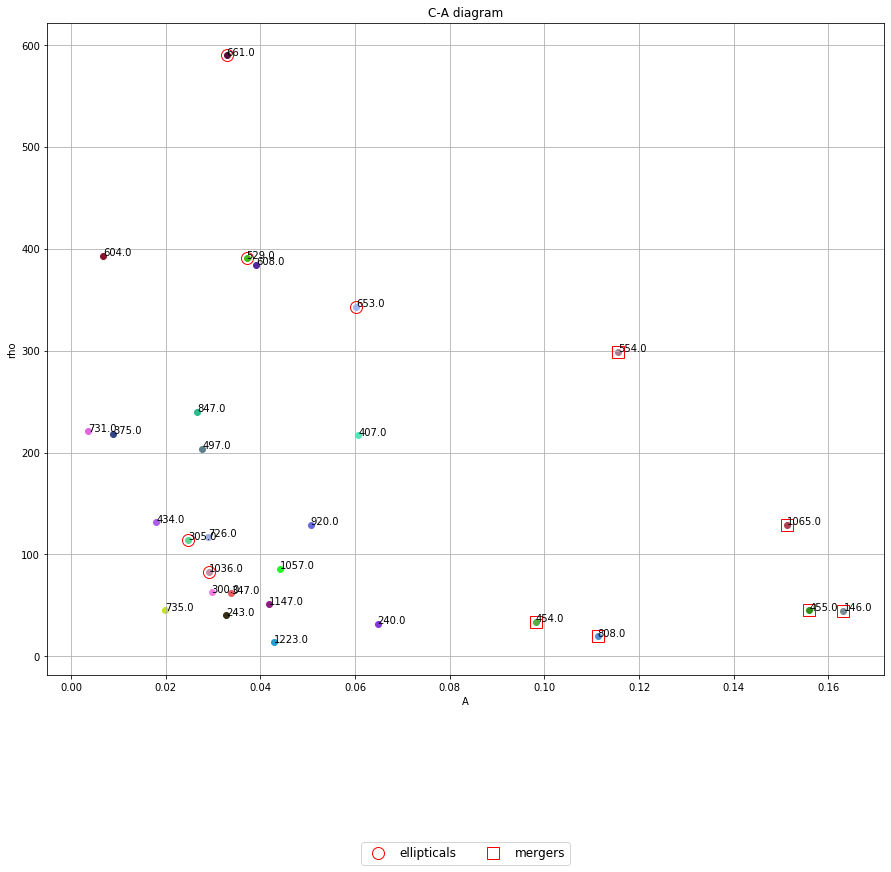

In [66]:
colour = ['#778B94', '#8439DA', '#322D14', '#FB7DE6', '#5BD792', '#EA5E66', '#304588', '#50E8BD', '#AB5DEA', '#58AE3F', '#2D8E15', '#5F7E8C', '#4AB612', '#AE798C', '#86142C', '#54279D', '#9DB7F1', '#5A0A36', '#9DACE1', '#DF66DC', '#C5E31A', '#538DCA', '#27BC8C', '#6468DB', '#C58EA2', '#25F829', '#AA4154', '#8E1F81', '#239DCF']

plt.rcParams["figure.figsize"] = (15,12)

plt.plot(np.abs(members_ellipCA['A']), (members_ellipCA['rho']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot(np.abs(members_mergerCA['A']), (members_mergerCA['rho']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_data)):
    
    plt.scatter(np.abs(OGMembers_data['A'][i]), (OGMembers_data['rho'][i]), color = colour[i])
    
    plt.text(np.abs(OGMembers_data['A'][i]), (OGMembers_data['rho'][i]), str(OGMembers_data['phot_id'][i]), color='black')





plt.xlabel('A')
plt.ylabel('rho')
plt.title('C-A diagram')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')



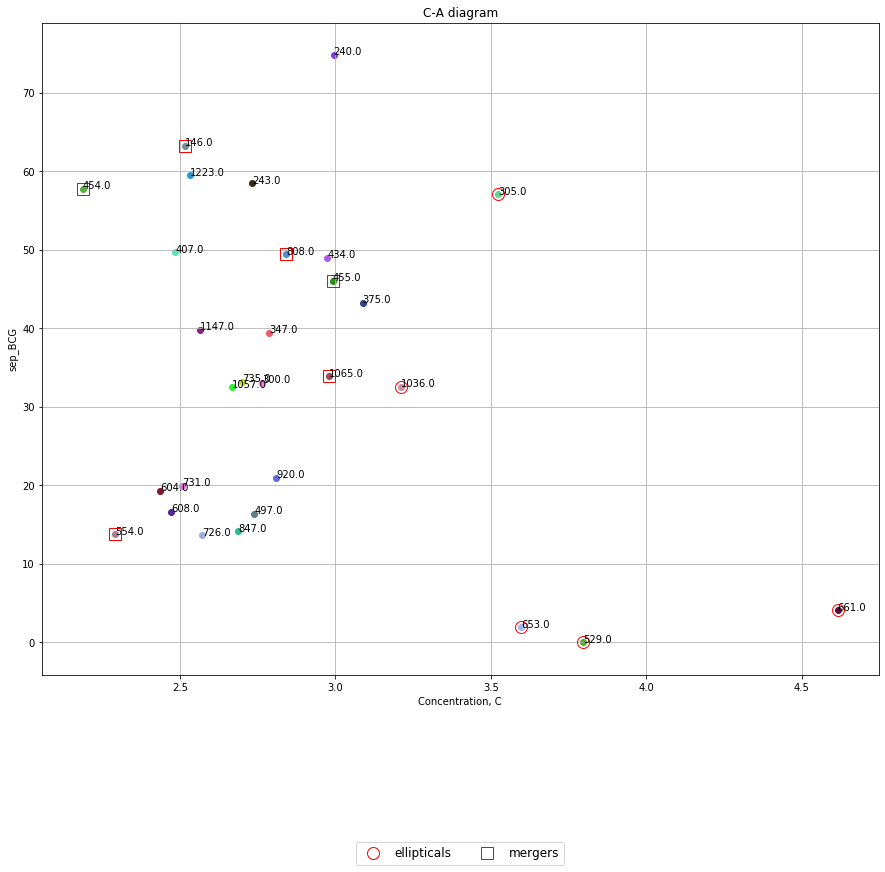

In [64]:
colour = ['#778B94', '#8439DA', '#322D14', '#FB7DE6', '#5BD792', '#EA5E66', '#304588', '#50E8BD', '#AB5DEA', '#58AE3F', '#2D8E15', '#5F7E8C', '#4AB612', '#AE798C', '#86142C', '#54279D', '#9DB7F1', '#5A0A36', '#9DACE1', '#DF66DC', '#C5E31A', '#538DCA', '#27BC8C', '#6468DB', '#C58EA2', '#25F829', '#AA4154', '#8E1F81', '#239DCF']

plt.rcParams["figure.figsize"] = (15,12)

plt.plot(np.abs(members_ellipCA['C']), (members_ellipCA['sep_BCG']), 'o', color = 'red', markersize=12, fillstyle='none', label='ellipticals')
plt.plot(np.abs(members_mergerCA['C']), (members_mergerCA['sep_BCG']), 's', color = 'red', markersize=12, fillstyle='none', label='mergers')



for i in range(len(OGMembers_data)):
    
    plt.scatter(np.abs(OGMembers_data['C'][i]), (OGMembers_data['sep_BCG'][i]), color = colour[i])
    
    plt.text(np.abs(OGMembers_data['C'][i]), (OGMembers_data['sep_BCG'][i]), str(OGMembers_data['phot_id'][i]), color='black')





plt.xlabel('Concentration, C')
plt.ylabel('sep_BCG')
plt.title('C-A diagram')



plt.grid(True)


plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3), ncol = 3, fontsize = 'large')



In [83]:
OGMembers_data

phot_id,Gini,M20,"F(G,M20)","S(G,M20)",C,A,S,sersic_cutout,sersic_psf,ra,dec,kron(f105),ekron(f105),0p8(f105),e0p8(f105),kron(f140),ekron(f140),0p8(f140),e0p8(f140),fwhm(asec),zz,zlo,zhi,chi,spec-id,mcode,snr,em-code,member1,member2,colour,d2d_5_1,avg_rho_1,d2d_5,avg_rho,sep_BCG,d_ang,R_mpc,rho,delta,log_delta,BCGsep_mpc,d_ang_1,R_mpc_1,rho_1,delta_1,log_delta_1,phi
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,str7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
146.0,0.47061407385916787,-1.3433392210998112,-0.6995262541749501,-0.04781621861229757,2.516624692410333,0.16317672786309842,0.0028551052071380425,0.8359274889073318,1.0412694010117967,34.444783,-3.772856,23.445999999999998,0.0372,24.1191,0.0378,22.9016,0.0304,23.6377,0.0405,0.895759,1.981413,1.9778799999999999,1.9856939999999998,0.9316639999999999,145,1,6.714639999999999,1,1.0,0.0,blue,26.11162986593104,47.68071642215873,22.216629373061103,95.36143284431746,63.27039259668711,1759.2925255187774,0.189492093728411,44.32389759706494,-0.5352010107752259,-0.33273482505529095,0.539651580932543,1759.2925255187774,0.22271368581033457,32.08679361945716,-0.3270488359410343,-0.17201645130241877,0.08317516356122207
240.0,0.544111141234312,-1.7246870065068014,-0.07144175538094188,-0.02806146408247656,2.9942829734708134,-0.06477465010358852,0.009861761830241724,1.4690106443940047,1.4690106443940047,34.45158,-3.770285,99.0,99.0,99.0,99.0,23.0151,0.0625,23.5353,0.077,0.612092,1.9773490000000002,1.275339,1.9799189999999998,1.13542,236,1,3.6847800000000004,1,0.984137,0.000669443,red,27.528370335840542,47.68071642215873,26.111629865931363,95.36143284431746,74.84541687719181,1759.6512766393612,0.22275910110267494,32.07371148222582,-0.6636616027510007,-0.4732235496896658,0.6385085063943611,1759.6512766393612,0.23484535673639592,28.857331988194048,-0.3947798155402058,-0.2180865964232536,0.06706860737029852
243.0,0.5049907015133024,-1.7626512584671599,-0.23877870539141144,-0.07206773042876591,2.731013355884195,0.03269493516456315,0.0,0.9361019844554965,5.258001755989425,34.422416999999996,-3.770003,23.7783,0.0393,24.0476,0.0353,22.6169,0.0283,22.8488,0.031,0.325858,1.977416,1.974125,1.9799080000000002,0.74305,240,1,10.0848,0,1.0,7.35868e-11,red,45.26627613801323,47.68071642215873,23.369032342347584,95.36143284431746,58.51408493074527,1759.6453852384627,0.1993612515236306,40.04410845609093,-0.5800806755759949,-0.376834138942437,0.49918375021520106,1759.6453852384627,0.3861666726497421,10.672607830184136,-0.7761651117887935,-0.6500722208607143,0.16581839961969455
300.0,0.5262552524058411,-1.719699681147167,-0.16328462155609946,-0.0450455557976735,2.763935862483167,0.029687281963913355,0.0,0.8830844140342652,4.353034512217102,34.435031,-3.7679480000000005,24.085,0.0539,24.3496,0.0423,22.5026,0.0233,22.7896,0.026000000000000002,0.338485,1.9868970000000001,1.9842830000000002,1.9890740000000002,0.769476,295,1,16.9164,0,1.0,1.13463e-22,red,28.84208405837951,47.68071642215873,18.652894507236958,95.36143284431746,33.07733823902072,1758.8039445078145,0.15905177927695233,62.91338722192038,-0.3402638221194748,-0.18062969990760758,0.2820478879897514,1758.8039445078145,0.24593420531922633,26.313720636034258,-0.4481265674983558,-0.25816051261285783,0.14439201910145769
305.0,0.600329345462422,-2.082245091909897,0.4546261087325476,-0.022106015767677956,3.524088195073759,0.02472485391861996,0.00794620468798356,1.1458361079713881,3.9063687693919165,34.447153,-3.768007,23.8277,0.0513,24.4884,0.0481,22.5249,0.0248,23.0674,0.0304,0.323371,1.9928669999999997,1.9901650000000002,1.995379,0.8747719999999999,298,1,11.8451,0,1.0,0.0,red,17.892732589349432,47.68071642215873,13.840356634258285,95.36143284431746,57.09300538953799,1758.2662746

In [84]:
OGMembers_data.write('OGMembers_data.fits')

In [85]:
x = fits.open('OGMembers_data.fits')
XX = Table(x[1].data)


In [86]:
XX

phot_id,Gini,M20,"F(G,M20)","S(G,M20)",C,A,S,sersic_cutout,sersic_psf,ra,dec,kron(f105),ekron(f105),0p8(f105),e0p8(f105),kron(f140),ekron(f140),0p8(f140),e0p8(f140),fwhm(asec),zz,zlo,zhi,chi,spec-id,mcode,snr,em-code,member1,member2,colour,d2d_5_1,avg_rho_1,d2d_5,avg_rho,sep_BCG,d_ang,R_mpc,rho,delta,log_delta,BCGsep_mpc,d_ang_1,R_mpc_1,rho_1,delta_1,log_delta_1,phi
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,str7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
146.0,0.47061407385916787,-1.3433392210998112,-0.6995262541749501,-0.04781621861229757,2.516624692410333,0.16317672786309842,0.0028551052071380425,0.8359274889073318,1.0412694010117967,34.444783,-3.772856,23.445999999999998,0.0372,24.1191,0.0378,22.9016,0.0304,23.6377,0.0405,0.895759,1.981413,1.9778799999999999,1.9856939999999998,0.9316639999999999,145,1,6.714639999999999,1,1.0,0.0,blue,26.11162986593104,47.68071642215873,22.216629373061103,95.36143284431746,63.27039259668711,1759.2925255187774,0.189492093728411,44.32389759706494,-0.5352010107752259,-0.33273482505529095,0.539651580932543,1759.2925255187774,0.22271368581033457,32.08679361945716,-0.3270488359410343,-0.17201645130241877,0.08317516356122207
240.0,0.544111141234312,-1.7246870065068014,-0.07144175538094188,-0.02806146408247656,2.9942829734708134,-0.06477465010358852,0.009861761830241724,1.4690106443940047,1.4690106443940047,34.45158,-3.770285,99.0,99.0,99.0,99.0,23.0151,0.0625,23.5353,0.077,0.612092,1.9773490000000002,1.275339,1.9799189999999998,1.13542,236,1,3.6847800000000004,1,0.984137,0.000669443,red,27.528370335840542,47.68071642215873,26.111629865931363,95.36143284431746,74.84541687719181,1759.6512766393612,0.22275910110267494,32.07371148222582,-0.6636616027510007,-0.4732235496896658,0.6385085063943611,1759.6512766393612,0.23484535673639592,28.857331988194048,-0.3947798155402058,-0.2180865964232536,0.06706860737029852
243.0,0.5049907015133024,-1.7626512584671599,-0.23877870539141144,-0.07206773042876591,2.731013355884195,0.03269493516456315,0.0,0.9361019844554965,5.258001755989425,34.422416999999996,-3.770003,23.7783,0.0393,24.0476,0.0353,22.6169,0.0283,22.8488,0.031,0.325858,1.977416,1.974125,1.9799080000000002,0.74305,240,1,10.0848,0,1.0,7.35868e-11,red,45.26627613801323,47.68071642215873,23.369032342347584,95.36143284431746,58.51408493074527,1759.6453852384627,0.1993612515236306,40.04410845609093,-0.5800806755759949,-0.376834138942437,0.49918375021520106,1759.6453852384627,0.3861666726497421,10.672607830184136,-0.7761651117887935,-0.6500722208607143,0.16581839961969455
300.0,0.5262552524058411,-1.719699681147167,-0.16328462155609946,-0.0450455557976735,2.763935862483167,0.029687281963913355,0.0,0.8830844140342652,4.353034512217102,34.435031,-3.7679480000000005,24.085,0.0539,24.3496,0.0423,22.5026,0.0233,22.7896,0.026000000000000002,0.338485,1.9868970000000001,1.9842830000000002,1.9890740000000002,0.769476,295,1,16.9164,0,1.0,1.13463e-22,red,28.84208405837951,47.68071642215873,18.652894507236958,95.36143284431746,33.07733823902072,1758.8039445078145,0.15905177927695233,62.91338722192038,-0.3402638221194748,-0.18062969990760758,0.2820478879897514,1758.8039445078145,0.24593420531922633,26.313720636034258,-0.4481265674983558,-0.25816051261285783,0.14439201910145769
305.0,0.600329345462422,-2.082245091909897,0.4546261087325476,-0.022106015767677956,3.524088195073759,0.02472485391861996,0.00794620468798356,1.1458361079713881,3.9063687693919165,34.447153,-3.768007,23.8277,0.0513,24.4884,0.0481,22.5249,0.0248,23.0674,0.0304,0.323371,1.9928669999999997,1.9901650000000002,1.995379,0.8747719999999999,298,1,11.8451,0,1.0,0.0,red,17.892732589349432,47.68071642215873,13.840356634258285,95.36143284431746,57.09300538953799,1758.2662746